In [21]:
import xarray as xr
import numpy as np

data_dir = "data"

ds_hist = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")
ds_ssp126 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp126_r1i1p1f1_2015_2100_allvars.nc")
ds_ssp245 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp245_r1i1p1f1_2015_2100_allvars.nc")
ds_ssp585 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")

In [2]:
ds_hist

<xarray.Dataset> Size: 8GB
Dimensions:            (time: 1980, lat: 192, lon: 384)
Coordinates:
  * time               (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 201...
  * lat                (lat) float64 2kB -89.28 -88.36 -87.42 ... 88.36 89.28
  * lon                (lon) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
Data variables:
    pr_hr              (time, lat, lon) float64 1GB ...
    hurs_hr            (time, lat, lon) float32 584MB ...
    sfcWind_hr         (time, lat, lon) float32 584MB ...
    tas_hr             (time, lat, lon) float32 584MB ...
    pr_lr_interp       (time, lat, lon) float64 1GB ...
    hurs_lr_interp     (time, lat, lon) float64 1GB ...
    sfcWind_lr_interp  (time, lat, lon) float64 1GB ...
    tas_lr_interp      (time, lat, lon) float64 1GB ...
Attributes:
    description:       Combined HR and LR-interpolated data on HR grid
    hr_source:         MPI-ESM1-2-HR_historical_r1i1p1f1_1850_2014_allvars.nc
    lr_interp_source:  MPI-ESM1-2-LR-to-HR_historical_r1i1p1f1_1850_2014_allv...

Original pr_hr statistics:
  Mean:     2.373345e+00
  Std:      2.978923e+00
  Min:      1.406e-13
  Max:      7.235e+01
  Skewness: 2.662761
  Kurtosis: 10.212133

Pixel-wise Z-score Normalized pr_hr statistics:
  Mean:     2.464023e-18
  Std:      1.000000
  Min:      -3.674
  Max:      36.178
  Skewness: 1.396639
  Kurtosis: 6.077654

Log-transformed pr_hr statistics (eps=0.03):
  Mean:     3.579996
  Std:      1.478731
  Min:      0.000
  Max:      7.788
  Skewness: -0.591429
  Kurtosis: -0.285414


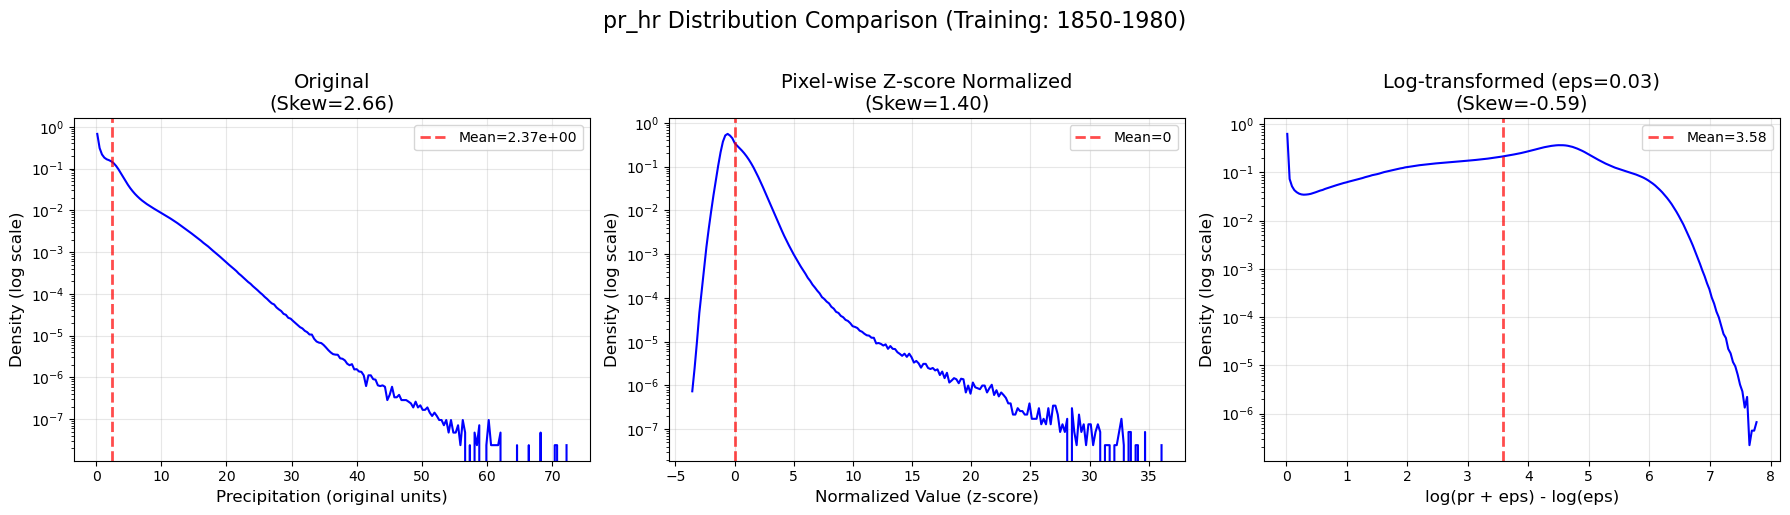

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load data
ds_hist = xr.open_dataset("data/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")

# Extract training period for precipitation
train_data = ds_hist['pr_hr'].sel(time=slice('1850', '1980'))

# Calculate 2D mean and std (averaging over time)
pixel_mean = train_data.mean(dim='time')
pixel_std = train_data.std(dim='time')

# Z-score normalize (pixel-wise)
data_normalized = (train_data - pixel_mean) / pixel_std

# Log transform
eps = 3e-2
data_log_transformed = np.log(train_data + eps) - np.log(eps)

# Flatten to 1D
data_original = train_data.values.flatten()
data_norm = data_normalized.values.flatten()
data_log = data_log_transformed.values.flatten()

# Remove NaNs
data_original = data_original[~np.isnan(data_original)]
data_norm = data_norm[~np.isnan(data_norm)]
data_log = data_log[~np.isnan(data_log)]

# Print statistics
print("="*60)
print(f"Original pr_hr statistics:")
print(f"  Mean:     {data_original.mean():.6e}")
print(f"  Std:      {data_original.std():.6e}")
print(f"  Min:      {data_original.min():.3e}")
print(f"  Max:      {data_original.max():.3e}")
print(f"  Skewness: {skew(data_original):.6f}")
print(f"  Kurtosis: {kurtosis(data_original):.6f}")

print("\n" + "="*60)
print(f"Pixel-wise Z-score Normalized pr_hr statistics:")
print(f"  Mean:     {data_norm.mean():.6e}")
print(f"  Std:      {data_norm.std():.6f}")
print(f"  Min:      {data_norm.min():.3f}")
print(f"  Max:      {data_norm.max():.3f}")
print(f"  Skewness: {skew(data_norm):.6f}")
print(f"  Kurtosis: {kurtosis(data_norm):.6f}")

print("\n" + "="*60)
print(f"Log-transformed pr_hr statistics (eps={eps}):")
print(f"  Mean:     {data_log.mean():.6f}")
print(f"  Std:      {data_log.std():.6f}")
print(f"  Min:      {data_log.min():.3f}")
print(f"  Max:      {data_log.max():.3f}")
print(f"  Skewness: {skew(data_log):.6f}")
print(f"  Kurtosis: {kurtosis(data_log):.6f}")
print("="*60)

# Create 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Original distribution
counts, bins = np.histogram(data_original, bins=200, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2
axes[0].plot(bin_centers, counts, 'b-', linewidth=1.5)
axes[0].axvline(data_original.mean(), color='red', linestyle='--', alpha=0.7, linewidth=2, label=f'Mean={data_original.mean():.2e}')
axes[0].set_xlabel('Precipitation (original units)', fontsize=12)
axes[0].set_ylabel('Density (log scale)', fontsize=12)
axes[0].set_title(f'Original\n(Skew={skew(data_original):.2f})', fontsize=14)
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Normalized distribution
counts, bins = np.histogram(data_norm, bins=200, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2
axes[1].plot(bin_centers, counts, 'b-', linewidth=1.5)
axes[1].axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Mean=0')
axes[1].set_xlabel('Normalized Value (z-score)', fontsize=12)
axes[1].set_ylabel('Density (log scale)', fontsize=12)
axes[1].set_title(f'Pixel-wise Z-score Normalized\n(Skew={skew(data_norm):.2f})', fontsize=14)
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Log-transformed distribution
counts, bins = np.histogram(data_log, bins=200, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2
axes[2].plot(bin_centers, counts, 'b-', linewidth=1.5)
axes[2].axvline(data_log.mean(), color='red', linestyle='--', alpha=0.7, linewidth=2, label=f'Mean={data_log.mean():.2f}')
axes[2].set_xlabel('log(pr + eps) - log(eps)', fontsize=12)
axes[2].set_ylabel('Density (log scale)', fontsize=12)
axes[2].set_title(f'Log-transformed (eps={eps})\n(Skew={skew(data_log):.2f})', fontsize=14)
axes[2].set_yscale('log')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('pr_hr Distribution Comparison (Training: 1850-1980)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Extracting spatial averages...
Computing monthly climatologies and anomalies...

Correlation (Historical anomalies): 0.243
Correlation (SSP585 anomalies): 0.554
Change in correlation: 0.311


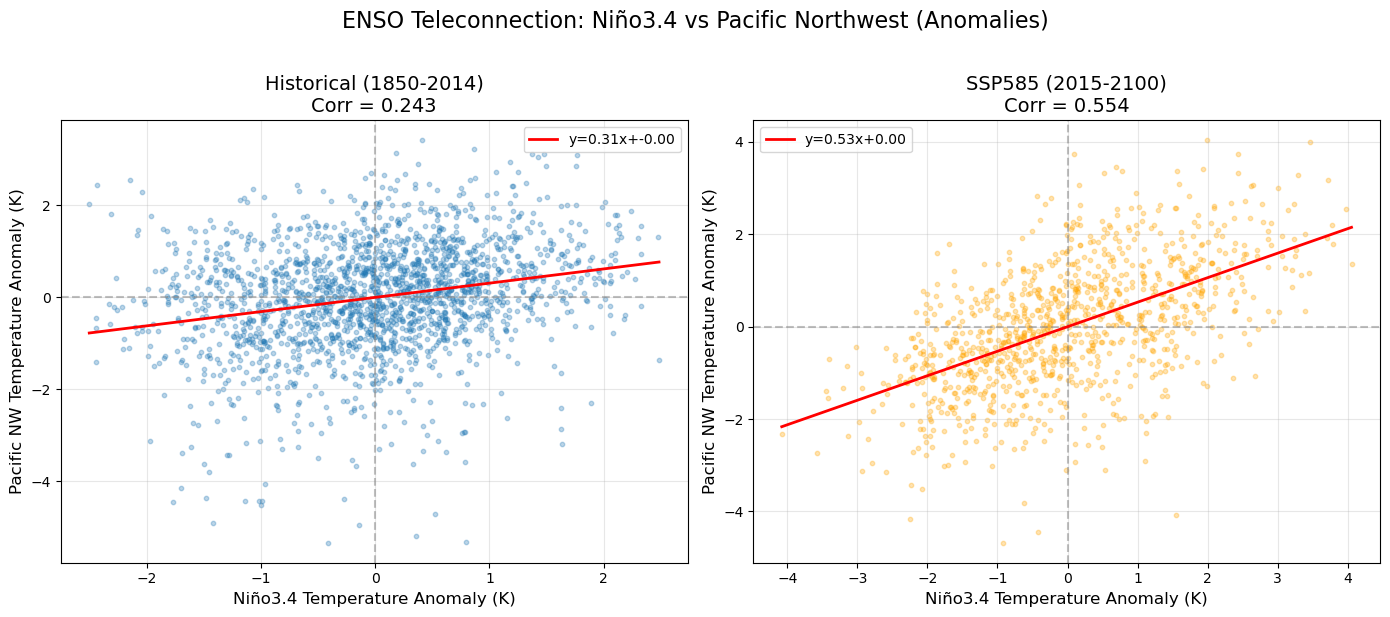


Anomaly Statistics:
Historical Niño3.4: Mean=-0.000K, Std=0.93K
SSP585 Niño3.4:     Mean=-0.000K, Std=1.42K

Historical PNW: Mean=-0.000K, Std=1.18K
SSP585 PNW:     Mean=0.000K, Std=1.36K


In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_dir = "data"
ds_hist = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")
ds_ssp585 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")

# Define Niño3.4 region (tropical Pacific): 5°S–5°N, 170°W–120°W
# Longitudes in 0-360: 170°W = 190°E, 120°W = 240°E
nino_lat_range = (-5, 5)
nino_lon_range = (190, 240)

# Define remote region: US Pacific Northwest (45°N, 125°W = 235°E)
remote_lat_range = (42.5, 47.5)
remote_lon_range = (232.5, 237.5)

print("Extracting spatial averages...")
# Extract spatial averages
nino_hist_raw = ds_hist['tas_hr'].sel(
    lat=slice(*nino_lat_range),
    lon=slice(*nino_lon_range)
).mean(dim=['lat', 'lon'])

nino_ssp585_raw = ds_ssp585['tas_hr'].sel(
    lat=slice(*nino_lat_range),
    lon=slice(*nino_lon_range)
).mean(dim=['lat', 'lon'])

pnw_hist_raw = ds_hist['tas_hr'].sel(
    lat=slice(*remote_lat_range),
    lon=slice(*remote_lon_range)
).mean(dim=['lat', 'lon'])

pnw_ssp585_raw = ds_ssp585['tas_hr'].sel(
    lat=slice(*remote_lat_range),
    lon=slice(*remote_lon_range)
).mean(dim=['lat', 'lon'])

print("Computing monthly climatologies and anomalies...")
# Compute monthly climatology for historical period
nino_hist_clim = nino_hist_raw.groupby('time.month').mean('time')
pnw_hist_clim = pnw_hist_raw.groupby('time.month').mean('time')

# Compute monthly climatology for SSP585 period
nino_ssp585_clim = nino_ssp585_raw.groupby('time.month').mean('time')
pnw_ssp585_clim = pnw_ssp585_raw.groupby('time.month').mean('time')

# Compute anomalies by removing monthly climatology
nino_hist_anom = nino_hist_raw.groupby('time.month') - nino_hist_clim
pnw_hist_anom = pnw_hist_raw.groupby('time.month') - pnw_hist_clim

nino_ssp585_anom = nino_ssp585_raw.groupby('time.month') - nino_ssp585_clim
pnw_ssp585_anom = pnw_ssp585_raw.groupby('time.month') - pnw_ssp585_clim

# Convert to numpy arrays
nino_hist_data = nino_hist_anom.values
nino_ssp585_data = nino_ssp585_anom.values
pnw_hist_data = pnw_hist_anom.values
pnw_ssp585_data = pnw_ssp585_anom.values

# Compute correlations
corr_hist = np.corrcoef(nino_hist_data, pnw_hist_data)[0, 1]
corr_ssp585 = np.corrcoef(nino_ssp585_data, pnw_ssp585_data)[0, 1]


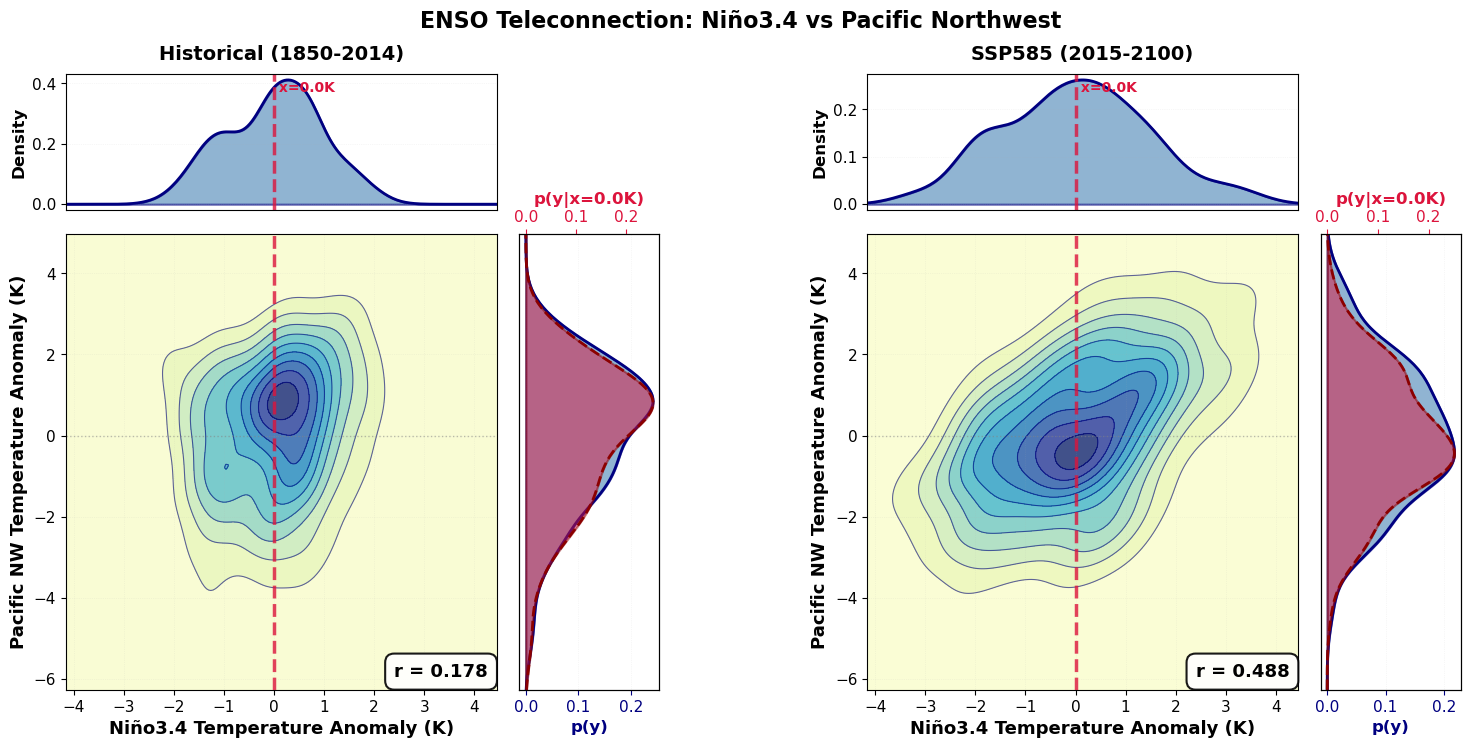

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def create_joint_marginal_conditional_plot(x, y, x0=0.0, ax_joint=None, ax_marg_x=None, ax_marg_y=None, title="", xlim=None, ylim=None):
    """
    Create joint, marginal, and conditional density plots.
    
    Parameters:
    -----------
    x, y : 1D arrays of anomalies
    x0 : float, value at which to compute conditional p(y|x=x0)
    ax_joint, ax_marg_x, ax_marg_y : matplotlib axes
    title : str, title for the plot
    xlim, ylim : tuple, fixed axis limits for consistency across plots
    """
    # Compute joint KDE
    values = np.vstack([x, y])
    kde_joint = gaussian_kde(values, bw_method='scott')
    
    # Determine ranges
    if xlim is None:
        xmin, xmax = x.min(), x.max()
        x_range = xmax - xmin
        xmin -= 0.1 * x_range
        xmax += 0.1 * x_range
    else:
        xmin, xmax = xlim
    
    if ylim is None:
        ymin, ymax = y.min(), y.max()
        y_range = ymax - ymin
        ymin -= 0.1 * y_range
        ymax += 0.1 * y_range
    else:
        ymin, ymax = ylim
    
    # Use consistent grid resolution
    grid_res = 200
    X, Y = np.mgrid[xmin:xmax:complex(0, grid_res), ymin:ymax:complex(0, grid_res)]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde_joint(positions).reshape(X.shape)
    
    # 1D KDEs for marginals
    kde_x = gaussian_kde(x, bw_method='scott')
    kde_y = gaussian_kde(y, bw_method='scott')
    
    x_grid = np.linspace(xmin, xmax, grid_res)
    y_grid = np.linspace(ymin, ymax, grid_res)
    
    px = kde_x(x_grid)  # p(x)
    py = kde_y(y_grid)  # p(y)
    
    # Conditional density p(y | x = x0)
    ix = np.argmin(np.abs(X[:, 0] - x0))
    Z_slice = Z[ix, :]
    # Normalize to make it a proper density
    cond = Z_slice / (np.trapz(Z_slice, y_grid) + 1e-10)
    
    # ----- Plot joint density -----
    # Use better contour levels
    contour_levels = 10
    
    # Filled contours with better colormap
    cf = ax_joint.contourf(X, Y, Z, levels=contour_levels, cmap='YlGnBu', alpha=0.8)
    
    # Stronger contour lines
    cs = ax_joint.contour(X, Y, Z, levels=contour_levels, colors='navy', linewidths=0.8, alpha=0.6)
    
    # Remove scatter points or make them very subtle
    # ax_joint.scatter(x, y, s=1, alpha=0.05, color='gray', rasterized=True)
    
    # Mark the conditional slice location
    ax_joint.axvline(x0, color='crimson', linestyle='--', linewidth=2.5, alpha=0.8, zorder=10)
    ax_joint.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    ax_joint.set_xlabel("Niño3.4 Temperature Anomaly (K)", fontsize=13, fontweight='bold')
    ax_joint.set_ylabel("Pacific NW Temperature Anomaly (K)", fontsize=13, fontweight='bold')
    ax_joint.tick_params(labelsize=11)
    ax_joint.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    
    # Set consistent limits
    ax_joint.set_xlim(xmin, xmax)
    ax_joint.set_ylim(ymin, ymax)
    
    # ----- Plot marginal p(x) on top -----
    ax_marg_x.fill_between(x_grid, px, alpha=0.6, color='steelblue', edgecolor='navy', linewidth=1.5)
    ax_marg_x.plot(x_grid, px, color='navy', linewidth=2)
    ax_marg_x.axvline(x0, color='crimson', linestyle='--', linewidth=2.5, alpha=0.8)
    
    ax_marg_x.set_ylabel("Density", fontsize=12, fontweight='bold')
    ax_marg_x.set_xlim(xmin, xmax)
    ax_marg_x.set_xticks([])
    ax_marg_x.tick_params(labelsize=11)
    ax_marg_x.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax_marg_x.set_title(title, fontsize=14, fontweight='bold', pad=10)
    
    # Add text annotation for x=0
    ax_marg_x.text(x0, ax_marg_x.get_ylim()[1] * 0.95, f' x={x0:.1f}K', 
                   fontsize=10, color='crimson', fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    
    # ----- Plot marginal p(y) and conditional p(y|x0) on right -----
    # Marginal p(y)
    ax_marg_y.fill_betweenx(y_grid, x1=0, x2=py, alpha=0.6, color='steelblue', 
                            edgecolor='navy', linewidth=1.5, label='p(y)')
    ax_marg_y.plot(py, y_grid, color='navy', linewidth=2)
    
    # Conditional p(y|x=x0) - don't scale, plot separately
    ax_marg_y_twin = ax_marg_y.twiny()  # Create twin axis for conditional
    ax_marg_y_twin.fill_betweenx(y_grid, x1=0, x2=cond, alpha=0.5, color='crimson', 
                                 edgecolor='darkred', linewidth=1.5, label=f'p(y|x={x0:.1f}K)')
    ax_marg_y_twin.plot(cond, y_grid, color='darkred', linestyle='--', linewidth=2)
    
    ax_marg_y.set_xlabel("p(y)", fontsize=12, fontweight='bold', color='navy')
    ax_marg_y_twin.set_xlabel(f"p(y|x={x0:.1f}K)", fontsize=12, fontweight='bold', color='crimson')
    
    ax_marg_y.set_ylim(ymin, ymax)
    ax_marg_y.set_yticks([])
    ax_marg_y.tick_params(labelsize=11, colors='navy')
    ax_marg_y_twin.tick_params(labelsize=11, colors='crimson')
    ax_marg_y.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    
    # Compute and display correlation in better location
    corr = np.corrcoef(x, y)[0, 1]
    ax_joint.text(0.98, 0.02, f'r = {corr:.3f}', 
                  transform=ax_joint.transAxes, 
                  fontsize=13, fontweight='bold',
                  verticalalignment='bottom', horizontalalignment='right',
                  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                           edgecolor='black', linewidth=1.5, alpha=0.9))

# Determine consistent axis limits across both periods
all_nino = np.concatenate([nino_hist_data, nino_ssp585_data])
all_pnw = np.concatenate([pnw_hist_data, pnw_ssp585_data])

nino_range = all_nino.max() - all_nino.min()
pnw_range = all_pnw.max() - all_pnw.min()

xlim = (all_nino.min() - 0.1 * nino_range, all_nino.max() + 0.1 * nino_range)
ylim = (all_pnw.min() - 0.1 * pnw_range, all_pnw.max() + 0.1 * pnw_range)

# Create the full figure with 1x2 layout
fig = plt.figure(figsize=(18, 8))

from matplotlib.gridspec import GridSpec

# Overall 1x2 grid
outer_gs = GridSpec(1, 2, figure=fig, wspace=0.35)

# Historical subplot (left)
gs_hist = outer_gs[0].subgridspec(2, 2, width_ratios=[4, 1.3], height_ratios=[1.2, 4],
                                   wspace=0.08, hspace=0.08)
ax_hist_marg_x = fig.add_subplot(gs_hist[0, 0])
ax_hist_joint = fig.add_subplot(gs_hist[1, 0])
ax_hist_marg_y = fig.add_subplot(gs_hist[1, 1])

# SSP585 subplot (right)
gs_ssp = outer_gs[1].subgridspec(2, 2, width_ratios=[4, 1.3], height_ratios=[1.2, 4],
                                  wspace=0.08, hspace=0.08)
ax_ssp_marg_x = fig.add_subplot(gs_ssp[0, 0])
ax_ssp_joint = fig.add_subplot(gs_ssp[1, 0])
ax_ssp_marg_y = fig.add_subplot(gs_ssp[1, 1])

# Create plots with consistent limits
x0_value = 0.0  # Conditional density at neutral ENSO

create_joint_marginal_conditional_plot(
    nino_hist_data, pnw_hist_data, x0=x0_value,
    ax_joint=ax_hist_joint, ax_marg_x=ax_hist_marg_x, ax_marg_y=ax_hist_marg_y,
    title="Historical (1850-2014)",
    xlim=xlim, ylim=ylim
)

create_joint_marginal_conditional_plot(
    nino_ssp585_data, pnw_ssp585_data, x0=x0_value,
    ax_joint=ax_ssp_joint, ax_marg_x=ax_ssp_marg_x, ax_marg_y=ax_ssp_marg_y,
    title="SSP585 (2015-2100)",
    xlim=xlim, ylim=ylim
)

plt.suptitle('ENSO Teleconnection: Niño3.4 vs Pacific Northwest', 
             fontsize=16, fontweight='bold', y=0.96)

# plt.savefig('enso_teleconnection_joint_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


ARCTIC AMPLIFICATION vs MID-LATITUDE TELECONNECTION

Arctic region: 72.5°N-77.5°N, 57.5°E-62.5°E
Mid-latitude region: 42.5°N-47.5°N, 7.5°E-12.5°E

Extracting spatial averages...
Computing monthly climatologies and anomalies...
Historical samples: 1980
SSP585 samples: 1032

Correlation (Historical): 0.013
Correlation (SSP585): 0.496
Change in correlation: 0.483


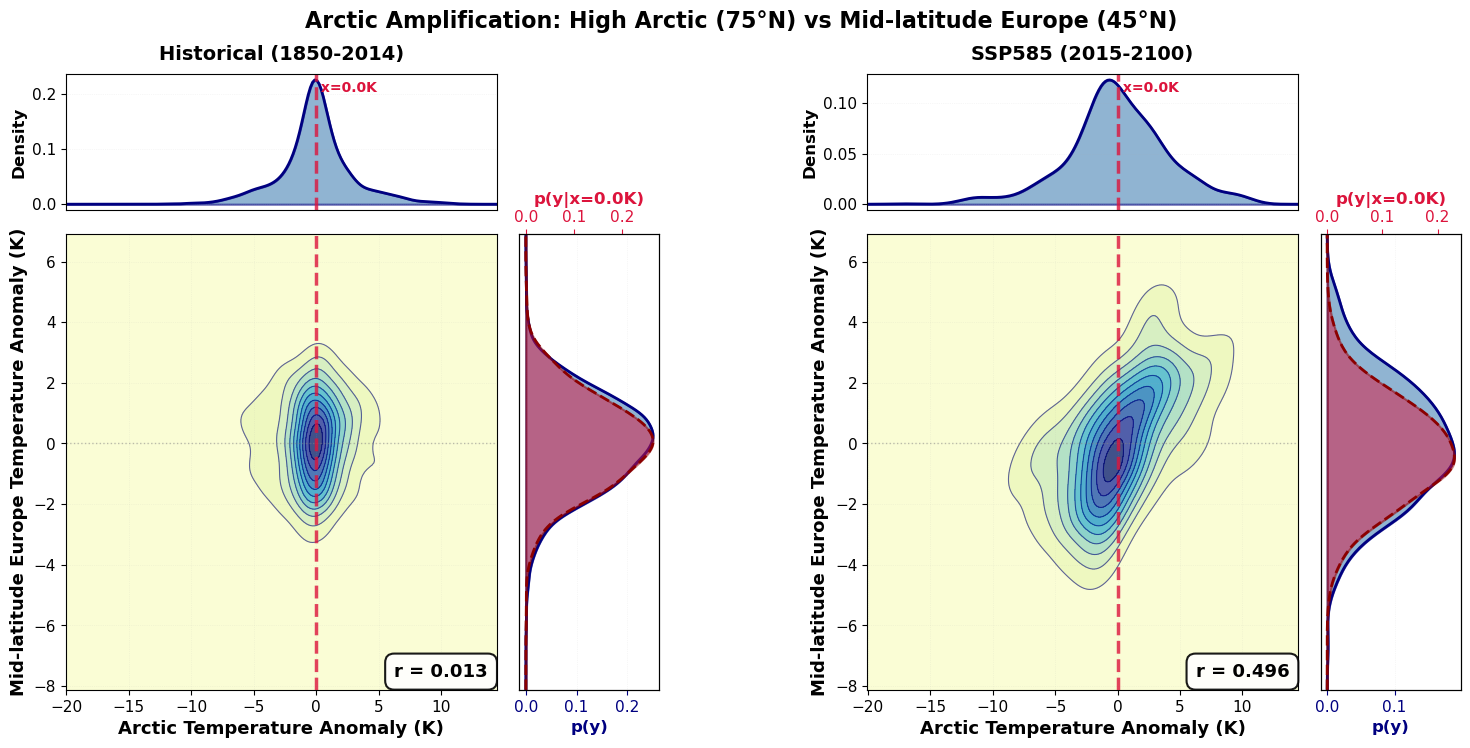

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load data (if not already loaded)
data_dir = "data"
ds_hist = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")
ds_ssp585 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")

# Define Arctic region (High Arctic): 75°N, 60°E with a small box
arctic_lat = 75
arctic_lon = 60
arctic_lat_range = (arctic_lat - 2.5, arctic_lat + 2.5)
arctic_lon_range = (arctic_lon - 2.5, arctic_lon + 2.5)

# Define mid-latitude region: Let's use mid-latitude Europe (45°N, 10°E)
midlat_lat = 45
midlat_lon = 10
midlat_lat_range = (midlat_lat - 2.5, midlat_lat + 2.5)
midlat_lon_range = (midlat_lon - 2.5, midlat_lon + 2.5)

print("=" * 70)
print("ARCTIC AMPLIFICATION vs MID-LATITUDE TELECONNECTION")
print("=" * 70)
print(f"\nArctic region: {arctic_lat_range[0]:.1f}°N-{arctic_lat_range[1]:.1f}°N, "
      f"{arctic_lon_range[0]:.1f}°E-{arctic_lon_range[1]:.1f}°E")
print(f"Mid-latitude region: {midlat_lat_range[0]:.1f}°N-{midlat_lat_range[1]:.1f}°N, "
      f"{midlat_lon_range[0]:.1f}°E-{midlat_lon_range[1]:.1f}°E")

print("\nExtracting spatial averages...")
# Extract spatial averages - Arctic
arctic_hist_raw = ds_hist['tas_hr'].sel(
    lat=slice(*arctic_lat_range),
    lon=slice(*arctic_lon_range)
).mean(dim=['lat', 'lon'])

arctic_ssp585_raw = ds_ssp585['tas_hr'].sel(
    lat=slice(*arctic_lat_range),
    lon=slice(*arctic_lon_range)
).mean(dim=['lat', 'lon'])

# Extract spatial averages - Mid-latitude
midlat_hist_raw = ds_hist['tas_hr'].sel(
    lat=slice(*midlat_lat_range),
    lon=slice(*midlat_lon_range)
).mean(dim=['lat', 'lon'])

midlat_ssp585_raw = ds_ssp585['tas_hr'].sel(
    lat=slice(*midlat_lat_range),
    lon=slice(*midlat_lon_range)
).mean(dim=['lat', 'lon'])

print("Computing monthly climatologies and anomalies...")
# Compute monthly climatology
arctic_hist_clim = arctic_hist_raw.groupby('time.month').mean('time')
midlat_hist_clim = midlat_hist_raw.groupby('time.month').mean('time')
arctic_ssp585_clim = arctic_ssp585_raw.groupby('time.month').mean('time')
midlat_ssp585_clim = midlat_ssp585_raw.groupby('time.month').mean('time')

# Compute anomalies
arctic_hist_anom = arctic_hist_raw.groupby('time.month') - arctic_hist_clim
midlat_hist_anom = midlat_hist_raw.groupby('time.month') - midlat_hist_clim
arctic_ssp585_anom = arctic_ssp585_raw.groupby('time.month') - arctic_ssp585_clim
midlat_ssp585_anom = midlat_ssp585_raw.groupby('time.month') - midlat_ssp585_clim

# Extract values
arctic_hist_data = arctic_hist_anom.values
midlat_hist_data = midlat_hist_anom.values
arctic_ssp585_data = arctic_ssp585_anom.values
midlat_ssp585_data = midlat_ssp585_anom.values

print(f"Historical samples: {len(arctic_hist_data)}")
print(f"SSP585 samples: {len(arctic_ssp585_data)}")

# Compute correlations
corr_hist = np.corrcoef(arctic_hist_data, midlat_hist_data)[0, 1]
corr_ssp585 = np.corrcoef(arctic_ssp585_data, midlat_ssp585_data)[0, 1]

print(f"\nCorrelation (Historical): {corr_hist:.3f}")
print(f"Correlation (SSP585): {corr_ssp585:.3f}")
print(f"Change in correlation: {corr_ssp585 - corr_hist:.3f}")

# Use the same plotting function from before
def create_joint_marginal_conditional_plot(x, y, x0=0.0, ax_joint=None, ax_marg_x=None, ax_marg_y=None, 
                                          title="", xlim=None, ylim=None, xlabel="X", ylabel="Y"):
    """
    Create joint, marginal, and conditional density plots.
    """
    # Compute joint KDE
    values = np.vstack([x, y])
    kde_joint = gaussian_kde(values, bw_method='scott')
    
    # Determine ranges
    if xlim is None:
        xmin, xmax = x.min(), x.max()
        x_range = xmax - xmin
        xmin -= 0.1 * x_range
        xmax += 0.1 * x_range
    else:
        xmin, xmax = xlim
    
    if ylim is None:
        ymin, ymax = y.min(), y.max()
        y_range = ymax - ymin
        ymin -= 0.1 * y_range
        ymax += 0.1 * y_range
    else:
        ymin, ymax = ylim
    
    # Use consistent grid resolution
    grid_res = 200
    X, Y = np.mgrid[xmin:xmax:complex(0, grid_res), ymin:ymax:complex(0, grid_res)]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde_joint(positions).reshape(X.shape)
    
    # 1D KDEs for marginals
    kde_x = gaussian_kde(x, bw_method='scott')
    kde_y = gaussian_kde(y, bw_method='scott')
    
    x_grid = np.linspace(xmin, xmax, grid_res)
    y_grid = np.linspace(ymin, ymax, grid_res)
    
    px = kde_x(x_grid)
    py = kde_y(y_grid)
    
    # Conditional density p(y | x = x0)
    ix = np.argmin(np.abs(X[:, 0] - x0))
    Z_slice = Z[ix, :]
    cond = Z_slice / (np.trapz(Z_slice, y_grid) + 1e-10)
    
    # ----- Plot joint density -----
    contour_levels = 10
    cf = ax_joint.contourf(X, Y, Z, levels=contour_levels, cmap='YlGnBu', alpha=0.8)
    cs = ax_joint.contour(X, Y, Z, levels=contour_levels, colors='navy', linewidths=0.8, alpha=0.6)
    
    # Mark the conditional slice location
    ax_joint.axvline(x0, color='crimson', linestyle='--', linewidth=2.5, alpha=0.8, zorder=10)
    ax_joint.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    ax_joint.set_xlabel(xlabel, fontsize=13, fontweight='bold')
    ax_joint.set_ylabel(ylabel, fontsize=13, fontweight='bold')
    ax_joint.tick_params(labelsize=11)
    ax_joint.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax_joint.set_xlim(xmin, xmax)
    ax_joint.set_ylim(ymin, ymax)
    
    # ----- Plot marginal p(x) on top -----
    ax_marg_x.fill_between(x_grid, px, alpha=0.6, color='steelblue', edgecolor='navy', linewidth=1.5)
    ax_marg_x.plot(x_grid, px, color='navy', linewidth=2)
    ax_marg_x.axvline(x0, color='crimson', linestyle='--', linewidth=2.5, alpha=0.8)
    
    ax_marg_x.set_ylabel("Density", fontsize=12, fontweight='bold')
    ax_marg_x.set_xlim(xmin, xmax)
    ax_marg_x.set_xticks([])
    ax_marg_x.tick_params(labelsize=11)
    ax_marg_x.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax_marg_x.set_title(title, fontsize=14, fontweight='bold', pad=10)
    
    ax_marg_x.text(x0, ax_marg_x.get_ylim()[1] * 0.95, f' x={x0:.1f}K', 
                   fontsize=10, color='crimson', fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    
    # ----- Plot marginal p(y) and conditional p(y|x0) on right -----
    ax_marg_y.fill_betweenx(y_grid, x1=0, x2=py, alpha=0.6, color='steelblue', 
                            edgecolor='navy', linewidth=1.5)
    ax_marg_y.plot(py, y_grid, color='navy', linewidth=2)
    
    ax_marg_y_twin = ax_marg_y.twiny()
    ax_marg_y_twin.fill_betweenx(y_grid, x1=0, x2=cond, alpha=0.5, color='crimson', 
                                 edgecolor='darkred', linewidth=1.5)
    ax_marg_y_twin.plot(cond, y_grid, color='darkred', linestyle='--', linewidth=2)
    
    ax_marg_y.set_xlabel("p(y)", fontsize=12, fontweight='bold', color='navy')
    ax_marg_y_twin.set_xlabel(f"p(y|x={x0:.1f}K)", fontsize=12, fontweight='bold', color='crimson')
    
    ax_marg_y.set_ylim(ymin, ymax)
    ax_marg_y.set_yticks([])
    ax_marg_y.tick_params(labelsize=11, colors='navy')
    ax_marg_y_twin.tick_params(labelsize=11, colors='crimson')
    ax_marg_y.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    
    # Display correlation
    corr = np.corrcoef(x, y)[0, 1]
    ax_joint.text(0.98, 0.02, f'r = {corr:.3f}', 
                  transform=ax_joint.transAxes, 
                  fontsize=13, fontweight='bold',
                  verticalalignment='bottom', horizontalalignment='right',
                  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                           edgecolor='black', linewidth=1.5, alpha=0.9))

# Determine consistent axis limits
all_arctic = np.concatenate([arctic_hist_data, arctic_ssp585_data])
all_midlat = np.concatenate([midlat_hist_data, midlat_ssp585_data])

arctic_range = all_arctic.max() - all_arctic.min()
midlat_range = all_midlat.max() - all_midlat.min()

xlim = (all_arctic.min() - 0.1 * arctic_range, all_arctic.max() + 0.1 * arctic_range)
ylim = (all_midlat.min() - 0.1 * midlat_range, all_midlat.max() + 0.1 * midlat_range)

# Create the full figure
fig = plt.figure(figsize=(18, 8))
from matplotlib.gridspec import GridSpec

outer_gs = GridSpec(1, 2, figure=fig, wspace=0.35)

# Historical subplot (left)
gs_hist = outer_gs[0].subgridspec(2, 2, width_ratios=[4, 1.3], height_ratios=[1.2, 4],
                                   wspace=0.08, hspace=0.08)
ax_hist_marg_x = fig.add_subplot(gs_hist[0, 0])
ax_hist_joint = fig.add_subplot(gs_hist[1, 0])
ax_hist_marg_y = fig.add_subplot(gs_hist[1, 1])

# SSP585 subplot (right)
gs_ssp = outer_gs[1].subgridspec(2, 2, width_ratios=[4, 1.3], height_ratios=[1.2, 4],
                                  wspace=0.08, hspace=0.08)
ax_ssp_marg_x = fig.add_subplot(gs_ssp[0, 0])
ax_ssp_joint = fig.add_subplot(gs_ssp[1, 0])
ax_ssp_marg_y = fig.add_subplot(gs_ssp[1, 1])

# Create plots
x0_value = 0.0

create_joint_marginal_conditional_plot(
    arctic_hist_data, midlat_hist_data, x0=x0_value,
    ax_joint=ax_hist_joint, ax_marg_x=ax_hist_marg_x, ax_marg_y=ax_hist_marg_y,
    title="Historical (1850-2014)",
    xlim=xlim, ylim=ylim,
    xlabel="Arctic Temperature Anomaly (K)",
    ylabel="Mid-latitude Europe Temperature Anomaly (K)"
)

create_joint_marginal_conditional_plot(
    arctic_ssp585_data, midlat_ssp585_data, x0=x0_value,
    ax_joint=ax_ssp_joint, ax_marg_x=ax_ssp_marg_x, ax_marg_y=ax_ssp_marg_y,
    title="SSP585 (2015-2100)",
    xlim=xlim, ylim=ylim,
    xlabel="Arctic Temperature Anomaly (K)",
    ylabel="Mid-latitude Europe Temperature Anomaly (K)"
)

plt.suptitle('Arctic Amplification: High Arctic (75°N) vs Mid-latitude Europe (45°N)', 
             fontsize=16, fontweight='bold', y=0.96)

# plt.savefig('arctic_midlatitude_joint_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


LAND-OCEAN CONTRAST (Same Latitude)

Land region (Inland China): 37.5°N-42.5°N, 107.5°E-112.5°E
Ocean region (Pacific):     37.5°N-42.5°N, 157.5°E-162.5°E

Extracting spatial averages...
Computing monthly climatologies and anomalies...
Historical samples: 1980
SSP585 samples: 1032

Correlation (Historical): 0.236
Correlation (SSP585): 0.583
Change in correlation: 0.347


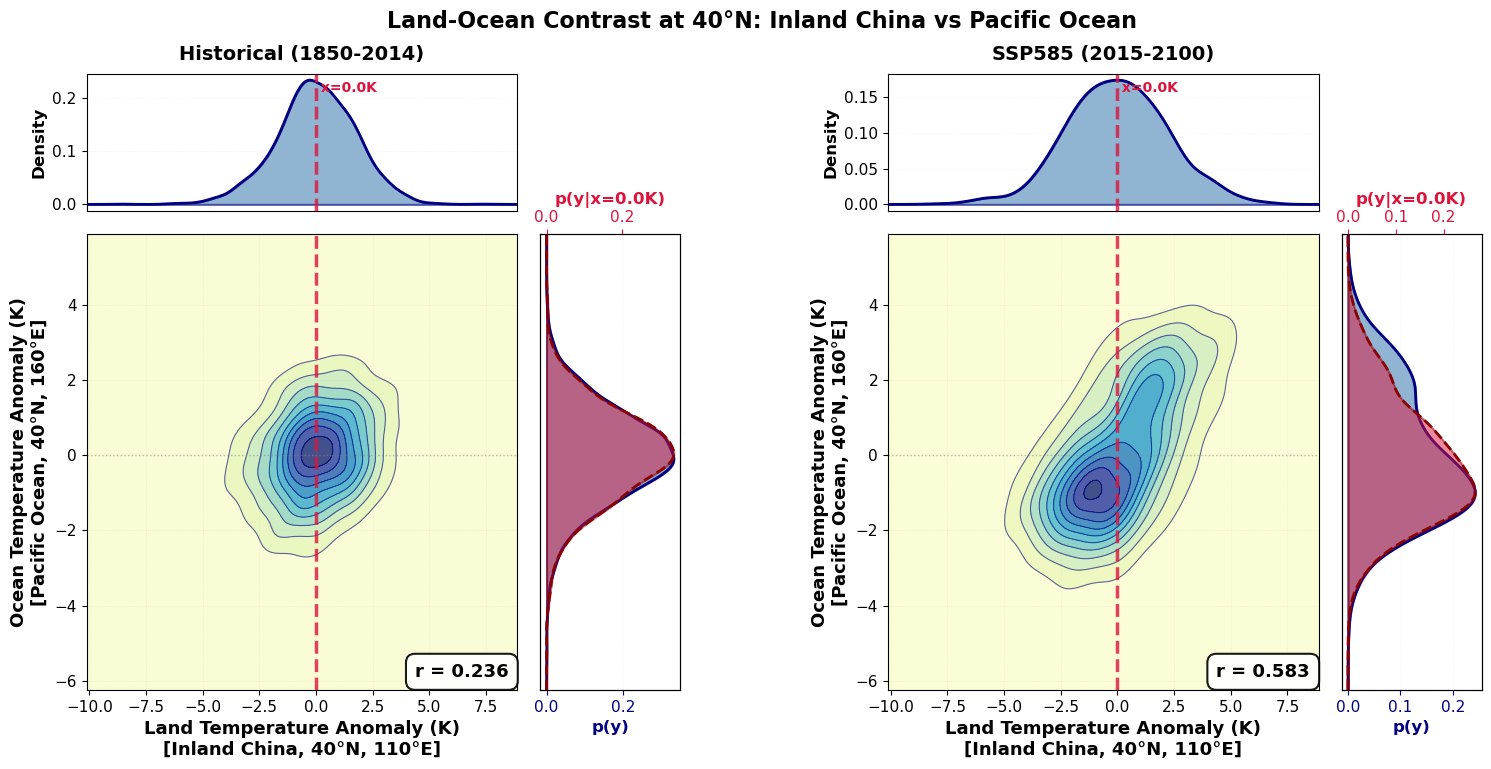

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load data (if not already loaded)
data_dir = "data"
ds_hist = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")
ds_ssp585 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")

# Define land region: Inland China (40°N, 110°E)
land_lat = 40
land_lon = 110
land_lat_range = (land_lat - 2.5, land_lat + 2.5)
land_lon_range = (land_lon - 2.5, land_lon + 2.5)

# Define ocean region: Pacific Ocean at same latitude (40°N, 160°E)
ocean_lat = 40
ocean_lon = 160
ocean_lat_range = (ocean_lat - 2.5, ocean_lat + 2.5)
ocean_lon_range = (ocean_lon - 2.5, ocean_lon + 2.5)

print("=" * 70)
print("LAND-OCEAN CONTRAST (Same Latitude)")
print("=" * 70)
print(f"\nLand region (Inland China): {land_lat_range[0]:.1f}°N-{land_lat_range[1]:.1f}°N, "
      f"{land_lon_range[0]:.1f}°E-{land_lon_range[1]:.1f}°E")
print(f"Ocean region (Pacific):     {ocean_lat_range[0]:.1f}°N-{ocean_lat_range[1]:.1f}°N, "
      f"{ocean_lon_range[0]:.1f}°E-{ocean_lon_range[1]:.1f}°E")

print("\nExtracting spatial averages...")
# Extract spatial averages - Land
land_hist_raw = ds_hist['tas_hr'].sel(
    lat=slice(*land_lat_range),
    lon=slice(*land_lon_range)
).mean(dim=['lat', 'lon'])

land_ssp585_raw = ds_ssp585['tas_hr'].sel(
    lat=slice(*land_lat_range),
    lon=slice(*land_lon_range)
).mean(dim=['lat', 'lon'])

# Extract spatial averages - Ocean
ocean_hist_raw = ds_hist['tas_hr'].sel(
    lat=slice(*ocean_lat_range),
    lon=slice(*ocean_lon_range)
).mean(dim=['lat', 'lon'])

ocean_ssp585_raw = ds_ssp585['tas_hr'].sel(
    lat=slice(*ocean_lat_range),
    lon=slice(*ocean_lon_range)
).mean(dim=['lat', 'lon'])

print("Computing monthly climatologies and anomalies...")
# Compute monthly climatology
land_hist_clim = land_hist_raw.groupby('time.month').mean('time')
ocean_hist_clim = ocean_hist_raw.groupby('time.month').mean('time')
land_ssp585_clim = land_ssp585_raw.groupby('time.month').mean('time')
ocean_ssp585_clim = ocean_ssp585_raw.groupby('time.month').mean('time')

# Compute anomalies
land_hist_anom = land_hist_raw.groupby('time.month') - land_hist_clim
ocean_hist_anom = ocean_hist_raw.groupby('time.month') - ocean_hist_clim
land_ssp585_anom = land_ssp585_raw.groupby('time.month') - land_ssp585_clim
ocean_ssp585_anom = ocean_ssp585_raw.groupby('time.month') - ocean_ssp585_clim

# Extract values
land_hist_data = land_hist_anom.values
ocean_hist_data = ocean_hist_anom.values
land_ssp585_data = land_ssp585_anom.values
ocean_ssp585_data = ocean_ssp585_anom.values

print(f"Historical samples: {len(land_hist_data)}")
print(f"SSP585 samples: {len(land_ssp585_data)}")

# Compute correlations
corr_hist = np.corrcoef(land_hist_data, ocean_hist_data)[0, 1]
corr_ssp585 = np.corrcoef(land_ssp585_data, ocean_ssp585_data)[0, 1]

print(f"\nCorrelation (Historical): {corr_hist:.3f}")
print(f"Correlation (SSP585): {corr_ssp585:.3f}")
print(f"Change in correlation: {corr_ssp585 - corr_hist:.3f}")

# Use the same plotting function
def create_joint_marginal_conditional_plot(x, y, x0=0.0, ax_joint=None, ax_marg_x=None, ax_marg_y=None, 
                                          title="", xlim=None, ylim=None, xlabel="X", ylabel="Y"):
    """
    Create joint, marginal, and conditional density plots.
    """
    # Compute joint KDE
    values = np.vstack([x, y])
    kde_joint = gaussian_kde(values, bw_method='scott')
    
    # Determine ranges
    if xlim is None:
        xmin, xmax = x.min(), x.max()
        x_range = xmax - xmin
        xmin -= 0.1 * x_range
        xmax += 0.1 * x_range
    else:
        xmin, xmax = xlim
    
    if ylim is None:
        ymin, ymax = y.min(), y.max()
        y_range = ymax - ymin
        ymin -= 0.1 * y_range
        ymax += 0.1 * y_range
    else:
        ymin, ymax = ylim
    
    # Use consistent grid resolution
    grid_res = 200
    X, Y = np.mgrid[xmin:xmax:complex(0, grid_res), ymin:ymax:complex(0, grid_res)]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde_joint(positions).reshape(X.shape)
    
    # 1D KDEs for marginals
    kde_x = gaussian_kde(x, bw_method='scott')
    kde_y = gaussian_kde(y, bw_method='scott')
    
    x_grid = np.linspace(xmin, xmax, grid_res)
    y_grid = np.linspace(ymin, ymax, grid_res)
    
    px = kde_x(x_grid)
    py = kde_y(y_grid)
    
    # Conditional density p(y | x = x0)
    ix = np.argmin(np.abs(X[:, 0] - x0))
    Z_slice = Z[ix, :]
    cond = Z_slice / (np.trapz(Z_slice, y_grid) + 1e-10)
    
    # ----- Plot joint density -----
    contour_levels = 10
    cf = ax_joint.contourf(X, Y, Z, levels=contour_levels, cmap='YlGnBu', alpha=0.8)
    cs = ax_joint.contour(X, Y, Z, levels=contour_levels, colors='navy', linewidths=0.8, alpha=0.6)
    
    # Mark the conditional slice location
    ax_joint.axvline(x0, color='crimson', linestyle='--', linewidth=2.5, alpha=0.8, zorder=10)
    ax_joint.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    ax_joint.set_xlabel(xlabel, fontsize=13, fontweight='bold')
    ax_joint.set_ylabel(ylabel, fontsize=13, fontweight='bold')
    ax_joint.tick_params(labelsize=11)
    ax_joint.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax_joint.set_xlim(xmin, xmax)
    ax_joint.set_ylim(ymin, ymax)
    
    # ----- Plot marginal p(x) on top -----
    ax_marg_x.fill_between(x_grid, px, alpha=0.6, color='steelblue', edgecolor='navy', linewidth=1.5)
    ax_marg_x.plot(x_grid, px, color='navy', linewidth=2)
    ax_marg_x.axvline(x0, color='crimson', linestyle='--', linewidth=2.5, alpha=0.8)
    
    ax_marg_x.set_ylabel("Density", fontsize=12, fontweight='bold')
    ax_marg_x.set_xlim(xmin, xmax)
    ax_marg_x.set_xticks([])
    ax_marg_x.tick_params(labelsize=11)
    ax_marg_x.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax_marg_x.set_title(title, fontsize=14, fontweight='bold', pad=10)
    
    ax_marg_x.text(x0, ax_marg_x.get_ylim()[1] * 0.95, f' x={x0:.1f}K', 
                   fontsize=10, color='crimson', fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    
    # ----- Plot marginal p(y) and conditional p(y|x0) on right -----
    ax_marg_y.fill_betweenx(y_grid, x1=0, x2=py, alpha=0.6, color='steelblue', 
                            edgecolor='navy', linewidth=1.5)
    ax_marg_y.plot(py, y_grid, color='navy', linewidth=2)
    
    ax_marg_y_twin = ax_marg_y.twiny()
    ax_marg_y_twin.fill_betweenx(y_grid, x1=0, x2=cond, alpha=0.5, color='crimson', 
                                 edgecolor='darkred', linewidth=1.5)
    ax_marg_y_twin.plot(cond, y_grid, color='darkred', linestyle='--', linewidth=2)
    
    ax_marg_y.set_xlabel("p(y)", fontsize=12, fontweight='bold', color='navy')
    ax_marg_y_twin.set_xlabel(f"p(y|x={x0:.1f}K)", fontsize=12, fontweight='bold', color='crimson')
    
    ax_marg_y.set_ylim(ymin, ymax)
    ax_marg_y.set_yticks([])
    ax_marg_y.tick_params(labelsize=11, colors='navy')
    ax_marg_y_twin.tick_params(labelsize=11, colors='crimson')
    ax_marg_y.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    
    # Display correlation
    corr = np.corrcoef(x, y)[0, 1]
    ax_joint.text(0.98, 0.02, f'r = {corr:.3f}', 
                  transform=ax_joint.transAxes, 
                  fontsize=13, fontweight='bold',
                  verticalalignment='bottom', horizontalalignment='right',
                  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                           edgecolor='black', linewidth=1.5, alpha=0.9))

# Determine consistent axis limits
all_land = np.concatenate([land_hist_data, land_ssp585_data])
all_ocean = np.concatenate([ocean_hist_data, ocean_ssp585_data])

land_range = all_land.max() - all_land.min()
ocean_range = all_ocean.max() - all_ocean.min()

xlim = (all_land.min() - 0.1 * land_range, all_land.max() + 0.1 * land_range)
ylim = (all_ocean.min() - 0.1 * ocean_range, all_ocean.max() + 0.1 * ocean_range)

# Create the full figure
fig = plt.figure(figsize=(18, 8))
from matplotlib.gridspec import GridSpec

outer_gs = GridSpec(1, 2, figure=fig, wspace=0.35)

# Historical subplot (left)
gs_hist = outer_gs[0].subgridspec(2, 2, width_ratios=[4, 1.3], height_ratios=[1.2, 4],
                                   wspace=0.08, hspace=0.08)
ax_hist_marg_x = fig.add_subplot(gs_hist[0, 0])
ax_hist_joint = fig.add_subplot(gs_hist[1, 0])
ax_hist_marg_y = fig.add_subplot(gs_hist[1, 1])

# SSP585 subplot (right)
gs_ssp = outer_gs[1].subgridspec(2, 2, width_ratios=[4, 1.3], height_ratios=[1.2, 4],
                                  wspace=0.08, hspace=0.08)
ax_ssp_marg_x = fig.add_subplot(gs_ssp[0, 0])
ax_ssp_joint = fig.add_subplot(gs_ssp[1, 0])
ax_ssp_marg_y = fig.add_subplot(gs_ssp[1, 1])

# Create plots
x0_value = 0.0

create_joint_marginal_conditional_plot(
    land_hist_data, ocean_hist_data, x0=x0_value,
    ax_joint=ax_hist_joint, ax_marg_x=ax_hist_marg_x, ax_marg_y=ax_hist_marg_y,
    title="Historical (1850-2014)",
    xlim=xlim, ylim=ylim,
    xlabel="Land Temperature Anomaly (K)\n[Inland China, 40°N, 110°E]",
    ylabel="Ocean Temperature Anomaly (K)\n[Pacific Ocean, 40°N, 160°E]"
)

create_joint_marginal_conditional_plot(
    land_ssp585_data, ocean_ssp585_data, x0=x0_value,
    ax_joint=ax_ssp_joint, ax_marg_x=ax_ssp_marg_x, ax_marg_y=ax_ssp_marg_y,
    title="SSP585 (2015-2100)",
    xlim=xlim, ylim=ylim,
    xlabel="Land Temperature Anomaly (K)\n[Inland China, 40°N, 110°E]",
    ylabel="Ocean Temperature Anomaly (K)\n[Pacific Ocean, 40°N, 160°E]"
)

plt.suptitle('Land-Ocean Contrast at 40°N: Inland China vs Pacific Ocean', 
             fontsize=16, fontweight='bold', y=0.96)

# plt.savefig('land_ocean_joint_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

ENSO TELECONNECTION: Variability Analysis (DJF)

Processing ground truth data...
  Computing Niño3.4 DJF index...
  Computing Pacific Northwest DJF temperature...
  Computing global DJF temperature...
  Total DJF seasons: 252
  Removing forced warming signal...
  Historical DJF samples: 165
  SSP585 DJF samples: 87

Processing model predictions...
  Processing Z-score Global...
  Processing MinMax Pixel...
  Processing Z-score Pixel...
  Processing Instance Z-score...


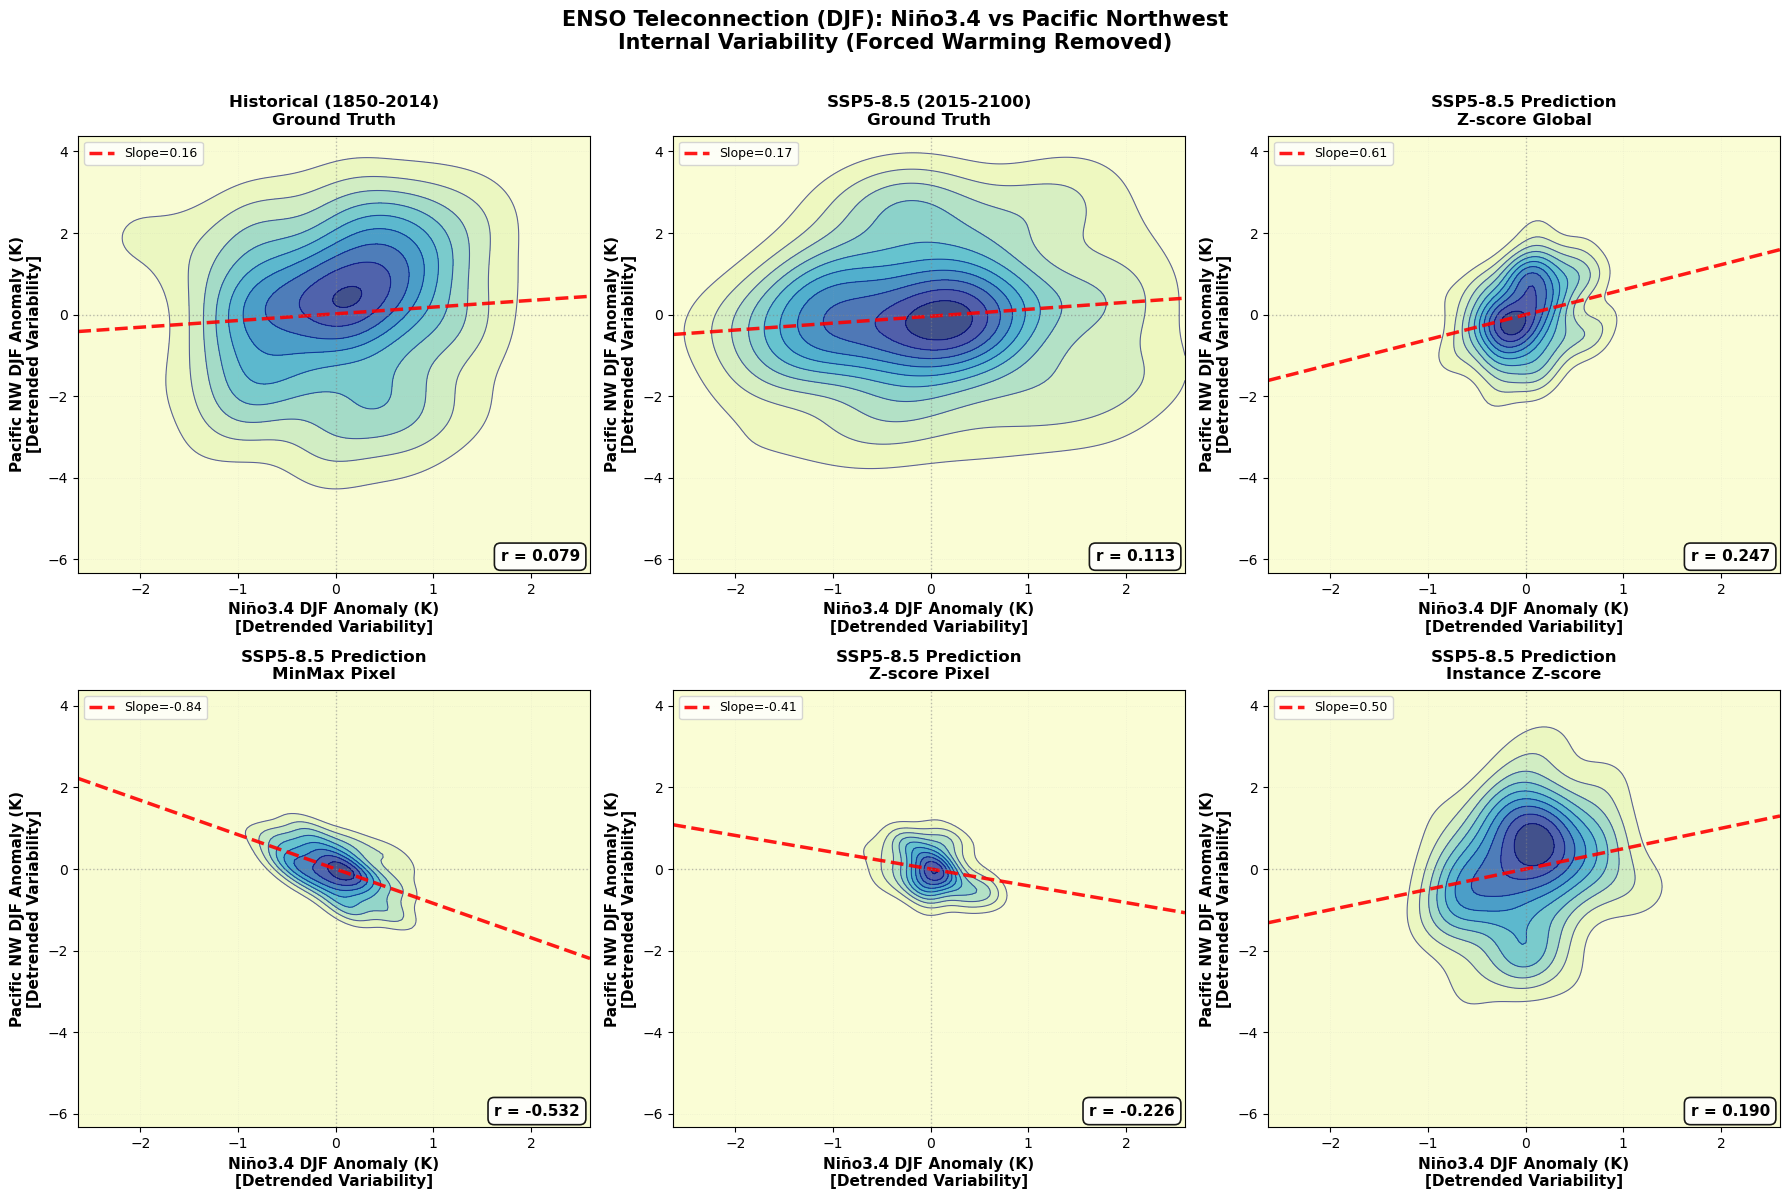

In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from pathlib import Path

# Load climate data
data_dir = "data"
ds_hist = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")
ds_ssp585 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")

# Load model predictions
eval_dir = Path("evaluation_results")
ds_pred = xr.open_dataset(eval_dir / "tas_evaluation_ssp585.nc")

print("="*80)
print("ENSO TELECONNECTION: Variability Analysis (DJF)")
print("="*80)

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def regress_out_global(a, Tg):
    """
    Remove the part of 'a' linearly related to global mean Tg.
    This isolates internal variability by removing the forced warming signal.
    """
    A = np.vstack([Tg, np.ones_like(Tg)]).T
    beta, c = np.linalg.lstsq(A, a, rcond=None)[0]
    return a - (beta * Tg + c)

def extract_djf_regional_mean(tas, lat_range, lon_range):
    """Extract DJF seasonal mean for a region"""
    # Select region
    region = tas.sel(lat=slice(*lat_range), lon=slice(*lon_range)).mean(['lat', 'lon'])
    
    # Select only DJF months (December=12, January=1, February=2)
    djf_months = region.where(
        (region['time'].dt.month == 12) | 
        (region['time'].dt.month == 1) | 
        (region['time'].dt.month == 2),
        drop=True
    )
    
    # Group by year (use the year from January for DJF labeling)
    # Shift December to belong to the following year
    years = djf_months['time'].dt.year.values
    months = djf_months['time'].dt.month.values
    
    # Adjust year for December (belongs to next DJF season)
    adjusted_years = np.where(months == 12, years + 1, years)
    
    # Create a year coordinate
    djf_months = djf_months.assign_coords(djf_year=('time', adjusted_years))
    
    # Group by DJF year and compute mean
    djf_yearly = djf_months.groupby('djf_year').mean('time')
    
    return djf_yearly.values, djf_yearly['djf_year'].values

# ============================================================================
# PROCESS GROUND TRUTH DATA
# ============================================================================

print("\nProcessing ground truth data...")

# Concatenate historical and SSP585
tas_all = xr.concat([ds_hist['tas_hr'], ds_ssp585['tas_hr']], dim='time')

# 1. Define Niño3.4 region DJF temperature
print("  Computing Niño3.4 DJF index...")
nino_vals, nino_years = extract_djf_regional_mean(tas_all, (-5, 5), (190, 240))

# 2. Define Pacific Northwest region DJF temperature
print("  Computing Pacific Northwest DJF temperature...")
pnw_vals, pnw_years = extract_djf_regional_mean(tas_all, (42.5, 52.5), (235, 250))

# 3. Global DJF temperature (for detrending)
print("  Computing global DJF temperature...")
glob_regional = tas_all.mean(['lat', 'lon'])

# Select only DJF months
glob_djf_months = glob_regional.where(
    (glob_regional['time'].dt.month == 12) | 
    (glob_regional['time'].dt.month == 1) | 
    (glob_regional['time'].dt.month == 2),
    drop=True
)

# Adjust years
years_glob = glob_djf_months['time'].dt.year.values
months_glob = glob_djf_months['time'].dt.month.values
adjusted_years_glob = np.where(months_glob == 12, years_glob + 1, years_glob)
glob_djf_months = glob_djf_months.assign_coords(djf_year=('time', adjusted_years_glob))

# Group by DJF year
glob_djf_yearly = glob_djf_months.groupby('djf_year').mean('time')
glob_vals = glob_djf_yearly.values
glob_years = glob_djf_yearly['djf_year'].values

# 4. Align all arrays (find common years)
common_years = np.intersect1d(np.intersect1d(nino_years, pnw_years), glob_years)

nino_mask = np.isin(nino_years, common_years)
pnw_mask = np.isin(pnw_years, common_years)
glob_mask = np.isin(glob_years, common_years)

nino_vals = nino_vals[nino_mask]
pnw_vals = pnw_vals[pnw_mask]
glob_vals = glob_vals[glob_mask]
years = common_years

print(f"  Total DJF seasons: {len(years)}")

# 5. Compute anomalies relative to baseline (1850-1900)
baseline_mask = (years >= 1850) & (years <= 1900)
nino_base = nino_vals[baseline_mask].mean()
pnw_base = pnw_vals[baseline_mask].mean()
glob_base = glob_vals[baseline_mask].mean()

# Compute anomalies
x_raw = nino_vals - nino_base
y_raw = pnw_vals - pnw_base
Tg = glob_vals - glob_base

# 6. Regress out global warming (isolate internal variability)
print("  Removing forced warming signal...")
x_res = regress_out_global(x_raw, Tg)
y_res = regress_out_global(y_raw, Tg)

# 7. Split into historical vs SSP585
hist_mask = years <= 2014
ssp_mask = years >= 2015

x_hist_gt = x_res[hist_mask]
y_hist_gt = y_res[hist_mask]
x_ssp_gt = x_res[ssp_mask]
y_ssp_gt = y_res[ssp_mask]

print(f"  Historical DJF samples: {len(x_hist_gt)}")
print(f"  SSP585 DJF samples: {len(x_ssp_gt)}")

# ============================================================================
# PROCESS MODEL PREDICTIONS
# ============================================================================

print("\nProcessing model predictions...")

norm_methods = ['zscore_global', 'minmax_pixel', 'zscore_pixel', 'instance_zscore']
model_labels = {
    'zscore_global': 'Z-score Global',
    'minmax_pixel': 'MinMax Pixel',
    'zscore_pixel': 'Z-score Pixel',
    'instance_zscore': 'Instance Z-score'
}

pred_data = {}

for method in norm_methods:
    pred_key = f'pred_{method}'
    if pred_key not in ds_pred:
        continue
    
    print(f"  Processing {model_labels[method]}...")
    
    # Extract SSP585 predictions
    tas_pred = ds_pred[pred_key]
    
    # Extract DJF means
    nino_pred_vals, nino_pred_years = extract_djf_regional_mean(tas_pred, (-5, 5), (190, 240))
    pnw_pred_vals, pnw_pred_years = extract_djf_regional_mean(tas_pred, (42.5, 52.5), (235, 250))
    
    # Global DJF
    glob_pred_regional = tas_pred.mean(['lat', 'lon'])
    glob_pred_djf_months = glob_pred_regional.where(
        (glob_pred_regional['time'].dt.month == 12) | 
        (glob_pred_regional['time'].dt.month == 1) | 
        (glob_pred_regional['time'].dt.month == 2),
        drop=True
    )
    years_pred = glob_pred_djf_months['time'].dt.year.values
    months_pred = glob_pred_djf_months['time'].dt.month.values
    adjusted_years_pred = np.where(months_pred == 12, years_pred + 1, years_pred)
    glob_pred_djf_months = glob_pred_djf_months.assign_coords(djf_year=('time', adjusted_years_pred))
    glob_pred_djf_yearly = glob_pred_djf_months.groupby('djf_year').mean('time')
    glob_pred_vals = glob_pred_djf_yearly.values
    
    # Compute anomalies (use same baseline as ground truth)
    x_pred_raw = nino_pred_vals - nino_base
    y_pred_raw = pnw_pred_vals - pnw_base
    Tg_pred = glob_pred_vals - glob_base
    
    # Regress out global warming
    x_pred_res = regress_out_global(x_pred_raw, Tg_pred)
    y_pred_res = regress_out_global(y_pred_raw, Tg_pred)
    
    pred_data[method] = {
        'x': x_pred_res,
        'y': y_pred_res
    }

# ============================================================================
# PLOTTING
# ============================================================================

def plot_joint_contour(x, y, ax, title, xlim, ylim):
    """Plot joint density contours for ENSO teleconnection"""
    # Compute joint KDE
    values = np.vstack([x, y])
    kde_joint = gaussian_kde(values, bw_method='scott')
    
    # Create grid
    grid_res = 150
    X, Y = np.mgrid[xlim[0]:xlim[1]:complex(0, grid_res), 
                     ylim[0]:ylim[1]:complex(0, grid_res)]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde_joint(positions).reshape(X.shape)
    
    # Plot contours
    contour_levels = 10
    ax.contourf(X, Y, Z, levels=contour_levels, cmap='YlGnBu', alpha=0.8)
    ax.contour(X, Y, Z, levels=contour_levels, colors='navy', linewidths=0.8, alpha=0.6)
    
    # Add regression line
    z = np.polyfit(x, y, 1)
    x_line = np.linspace(xlim[0], xlim[1], 100)
    y_line = np.polyval(z, x_line)
    ax.plot(x_line, y_line, 'r--', linewidth=2.5, alpha=0.9, label=f'Slope={z[0]:.2f}')
    
    # Reference lines
    ax.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax.axvline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    # Labels and formatting
    ax.set_xlabel('Niño3.4 DJF Anomaly (K)\n[Detrended Variability]', 
                  fontsize=11, fontweight='bold')
    ax.set_ylabel('Pacific NW DJF Anomaly (K)\n[Detrended Variability]', 
                  fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold', pad=8)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax.tick_params(labelsize=10)
    ax.legend(loc='upper left', fontsize=9)
    
    # Add correlation
    corr = np.corrcoef(x, y)[0, 1]
    ax.text(0.98, 0.02, f'r = {corr:.3f}', 
            transform=ax.transAxes, fontsize=11, fontweight='bold',
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                     edgecolor='black', linewidth=1.2, alpha=0.9))

# Determine consistent axis limits
all_x = np.concatenate([x_hist_gt, x_ssp_gt] + [pred_data[m]['x'] for m in norm_methods])
all_y = np.concatenate([y_hist_gt, y_ssp_gt] + [pred_data[m]['y'] for m in norm_methods])

x_range = all_x.max() - all_x.min()
y_range = all_y.max() - all_y.min()

xlim = (all_x.min() - 0.1 * x_range, all_x.max() + 0.1 * x_range)
ylim = (all_y.min() - 0.1 * y_range, all_y.max() + 0.1 * y_range)

# Create 2x3 subplot figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Historical (Ground Truth)
plot_joint_contour(x_hist_gt, y_hist_gt, axes[0, 0],
                   'Historical (1850-2014)\nGround Truth', xlim, ylim)

# Plot 2: SSP585 (Ground Truth)
plot_joint_contour(x_ssp_gt, y_ssp_gt, axes[0, 1],
                   'SSP5-8.5 (2015-2100)\nGround Truth', xlim, ylim)

# Plot 3-6: Model Predictions for SSP585
plot_positions = [(0, 2), (1, 0), (1, 1), (1, 2)]
for idx, method in enumerate(norm_methods):
    if method in pred_data:
        row, col = plot_positions[idx]
        plot_joint_contour(pred_data[method]['x'], pred_data[method]['y'],
                          axes[row, col],
                          f'SSP5-8.5 Prediction\n{model_labels[method]}', xlim, ylim)

# Overall title
fig.suptitle('ENSO Teleconnection (DJF): Niño3.4 vs Pacific Northwest\n' +
             'Internal Variability (Forced Warming Removed)',
             fontsize=15, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0, 0, 1, 0.985])


plt.show()


LAND-OCEAN CONTRAST: Ground Truth vs Model Predictions
Land region:  30-60°N, 60-140°E (Eurasia)
Ocean region: 30-60°N, 140-240°E (Pacific)

Processing ground truth data...
Computing annual means...

Processing model predictions...


/home.ufs/yw4236/.local/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
/home.ufs/yw4236/.local/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
/home.ufs/yw4236/.local/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
/home.ufs/yw4236/.local/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
/home.ufs/yw4236/.local/lib/python3.9/site-packages/xarray/groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use

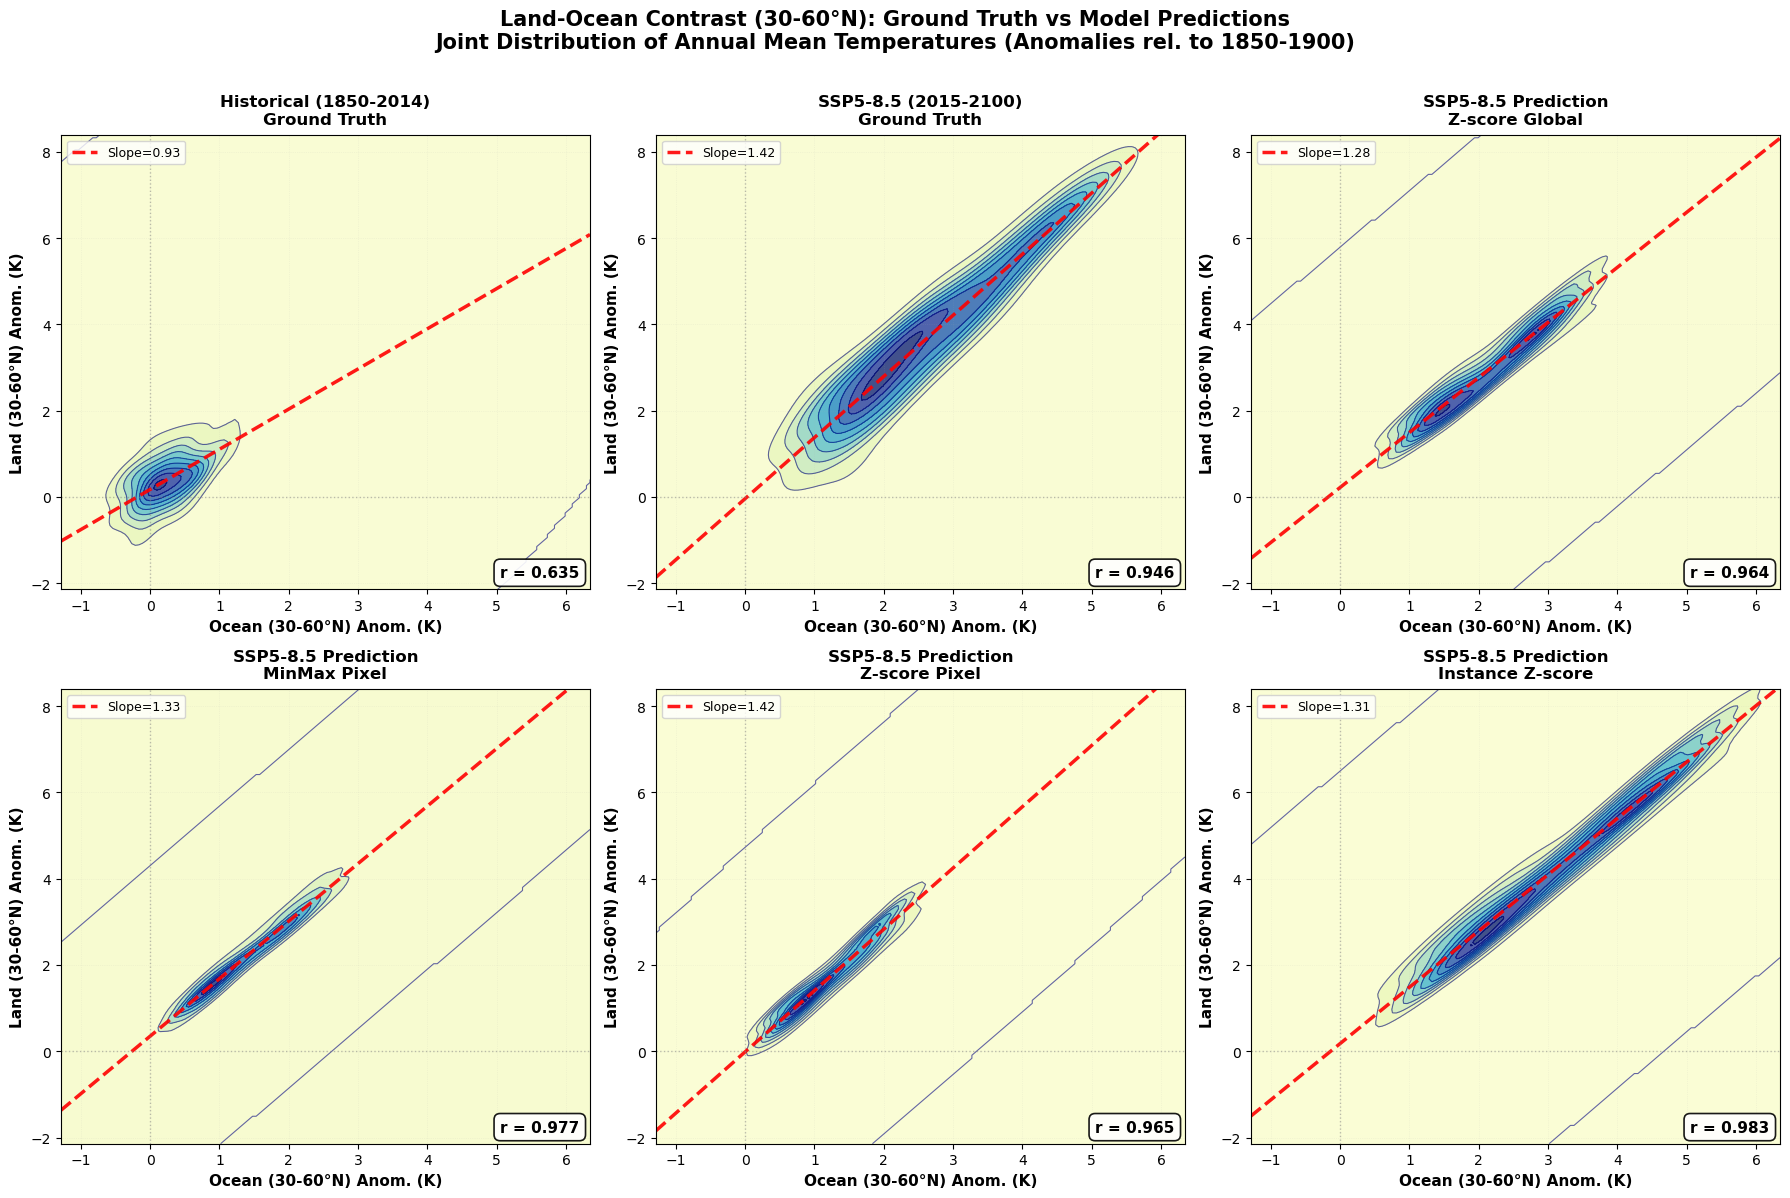

In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from pathlib import Path

# Load climate data
data_dir = "data"
ds_hist = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")
ds_ssp585 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")

# Load model predictions
eval_dir = Path("evaluation_results")
ds_pred = xr.open_dataset(eval_dir / "tas_evaluation_ssp585.nc")

# Define larger regions at same latitude band (30-60°N for better land-ocean separation)
# Land-dominated: Use continental interiors
land_lat_range = (30, 60)  # NH mid-latitudes
land_lon_range = (60, 140)  # Eurasia (land-dominated)

# Ocean-dominated: Pacific Ocean
ocean_lat_range = (30, 60)  # Same latitude
ocean_lon_range = (140, 240)  # Pacific Ocean

print("="*80)
print("LAND-OCEAN CONTRAST: Ground Truth vs Model Predictions")
print("="*80)
print(f"Land region:  {land_lat_range[0]}-{land_lat_range[1]}°N, {land_lon_range[0]}-{land_lon_range[1]}°E (Eurasia)")
print(f"Ocean region: {ocean_lat_range[0]}-{ocean_lat_range[1]}°N, {ocean_lon_range[0]}-{ocean_lon_range[1]}°E (Pacific)")

# Extract regional means for ground truth
print("\nProcessing ground truth data...")
land_hist = ds_hist['tas_hr'].sel(lat=slice(*land_lat_range), lon=slice(*land_lon_range)).mean(dim=['lat', 'lon'])
land_ssp585 = ds_ssp585['tas_hr'].sel(lat=slice(*land_lat_range), lon=slice(*land_lon_range)).mean(dim=['lat', 'lon'])
ocean_hist = ds_hist['tas_hr'].sel(lat=slice(*ocean_lat_range), lon=slice(*ocean_lon_range)).mean(dim=['lat', 'lon'])
ocean_ssp585 = ds_ssp585['tas_hr'].sel(lat=slice(*ocean_lat_range), lon=slice(*ocean_lon_range)).mean(dim=['lat', 'lon'])

# Common baseline (1850-1900)
baseline_period = slice('1850', '1900')
land_baseline = ds_hist['tas_hr'].sel(lat=slice(*land_lat_range), lon=slice(*land_lon_range), time=baseline_period).mean(dim=['lat', 'lon', 'time'])
ocean_baseline = ds_hist['tas_hr'].sel(lat=slice(*ocean_lat_range), lon=slice(*ocean_lon_range), time=baseline_period).mean(dim=['lat', 'lon', 'time'])

# Compute anomalies relative to common baseline
land_hist_anom = land_hist - land_baseline
land_ssp585_anom = land_ssp585 - land_baseline
ocean_hist_anom = ocean_hist - ocean_baseline
ocean_ssp585_anom = ocean_ssp585 - ocean_baseline

# Annual means to reduce monthly noise
print("Computing annual means...")
land_hist_annual = land_hist_anom.resample(time='1Y').mean().values
land_ssp585_annual = land_ssp585_anom.resample(time='1Y').mean().values
ocean_hist_annual = ocean_hist_anom.resample(time='1Y').mean().values
ocean_ssp585_annual = ocean_ssp585_anom.resample(time='1Y').mean().values

# Process model predictions for SSP585
norm_methods = ['zscore_global', 'minmax_pixel', 'zscore_pixel', 'instance_zscore']
model_labels = {
    'zscore_global': 'Z-score Global',
    'minmax_pixel': 'MinMax Pixel',
    'zscore_pixel': 'Z-score Pixel',
    'instance_zscore': 'Instance Z-score'
}

pred_data = {}
print("\nProcessing model predictions...")
for method in norm_methods:
    pred_key = f'pred_{method}'
    if pred_key in ds_pred:
        # Extract predictions
        land_pred = ds_pred[pred_key].sel(lat=slice(*land_lat_range), lon=slice(*land_lon_range)).mean(dim=['lat', 'lon'])
        ocean_pred = ds_pred[pred_key].sel(lat=slice(*ocean_lat_range), lon=slice(*ocean_lon_range)).mean(dim=['lat', 'lon'])
        
        # Compute anomalies relative to same baseline
        land_pred_anom = land_pred - land_baseline
        ocean_pred_anom = ocean_pred - ocean_baseline
        
        # Annual means
        land_pred_annual = land_pred_anom.resample(time='1Y').mean().values
        ocean_pred_annual = ocean_pred_anom.resample(time='1Y').mean().values
        
        pred_data[method] = {
            'land': land_pred_annual,
            'ocean': ocean_pred_annual
        }

# Function to plot joint contours only
def plot_joint_contour(x, y, ax, title, xlim, ylim):
    """Plot joint density contours (x=ocean, y=land)"""
    # Compute joint KDE
    values = np.vstack([x, y])
    kde_joint = gaussian_kde(values, bw_method='scott')
    
    # Create grid
    grid_res = 150
    X, Y = np.mgrid[xlim[0]:xlim[1]:complex(0, grid_res), 
                     ylim[0]:ylim[1]:complex(0, grid_res)]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde_joint(positions).reshape(X.shape)
    
    # Plot contours
    contour_levels = 10
    ax.contourf(X, Y, Z, levels=contour_levels, cmap='YlGnBu', alpha=0.8)
    ax.contour(X, Y, Z, levels=contour_levels, colors='navy', linewidths=0.8, alpha=0.6)
    
    # Add regression line
    z = np.polyfit(x, y, 1)
    x_line = np.linspace(xlim[0], xlim[1], 100)
    y_line = np.polyval(z, x_line)
    ax.plot(x_line, y_line, 'r--', linewidth=2.5, alpha=0.9, label=f'Slope={z[0]:.2f}')
    
    # Reference lines
    ax.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax.axvline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    # Labels and formatting
    ax.set_xlabel(f'Ocean ({ocean_lat_range[0]}-{ocean_lat_range[1]}°N) Anom. (K)', 
                  fontsize=11, fontweight='bold')
    ax.set_ylabel(f'Land ({land_lat_range[0]}-{land_lat_range[1]}°N) Anom. (K)', 
                  fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold', pad=8)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax.tick_params(labelsize=10)
    ax.legend(loc='upper left', fontsize=9)
    
    # Add correlation
    corr = np.corrcoef(x, y)[0, 1]
    ax.text(0.98, 0.02, f'r = {corr:.3f}', 
            transform=ax.transAxes, fontsize=11, fontweight='bold',
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                     edgecolor='black', linewidth=1.2, alpha=0.9))

# Determine consistent axis limits
all_ocean = np.concatenate([ocean_hist_annual, ocean_ssp585_annual] + 
                            [pred_data[m]['ocean'] for m in norm_methods])
all_land = np.concatenate([land_hist_annual, land_ssp585_annual] + 
                          [pred_data[m]['land'] for m in norm_methods])

ocean_range = all_ocean.max() - all_ocean.min()
land_range = all_land.max() - all_land.min()

xlim = (all_ocean.min() - 0.1 * ocean_range, all_ocean.max() + 0.1 * ocean_range)
ylim = (all_land.min() - 0.1 * land_range, all_land.max() + 0.1 * land_range)

# Create 2x3 subplot figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Historical (Ground Truth)
plot_joint_contour(ocean_hist_annual, land_hist_annual, axes[0, 0],
                   'Historical (1850-2014)\nGround Truth', xlim, ylim)

# Plot 2: SSP585 (Ground Truth)
plot_joint_contour(ocean_ssp585_annual, land_ssp585_annual, axes[0, 1],
                   'SSP5-8.5 (2015-2100)\nGround Truth', xlim, ylim)

# Plot 3-6: Model Predictions for SSP585
plot_positions = [(0, 2), (1, 0), (1, 1), (1, 2)]
for idx, method in enumerate(norm_methods):
    if method in pred_data:
        row, col = plot_positions[idx]
        plot_joint_contour(pred_data[method]['ocean'], pred_data[method]['land'],
                          axes[row, col],
                          f'SSP5-8.5 Prediction\n{model_labels[method]}', xlim, ylim)

# Overall title
fig.suptitle('Land-Ocean Contrast (30-60°N): Ground Truth vs Model Predictions\n' +
             'Joint Distribution of Annual Mean Temperatures (Anomalies rel. to 1850-1900)',
             fontsize=15, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0, 0, 1, 0.985])


plt.show()


AMV TELECONNECTION: Multidecadal Variability Analysis

Processing ground truth data...
  Computing annual means...
  Computing global annual mean...
  Computing AMV index (North Atlantic)...
  Computing European temperature...
  Applying 11-year running mean filter...
  Removing forced warming signal...
  Historical decadal samples: 160
  SSP585 decadal samples: 81

Processing model predictions...
  Processing Z-score Global...
  Processing MinMax Pixel...
  Processing Z-score Pixel...
  Processing Instance Z-score...


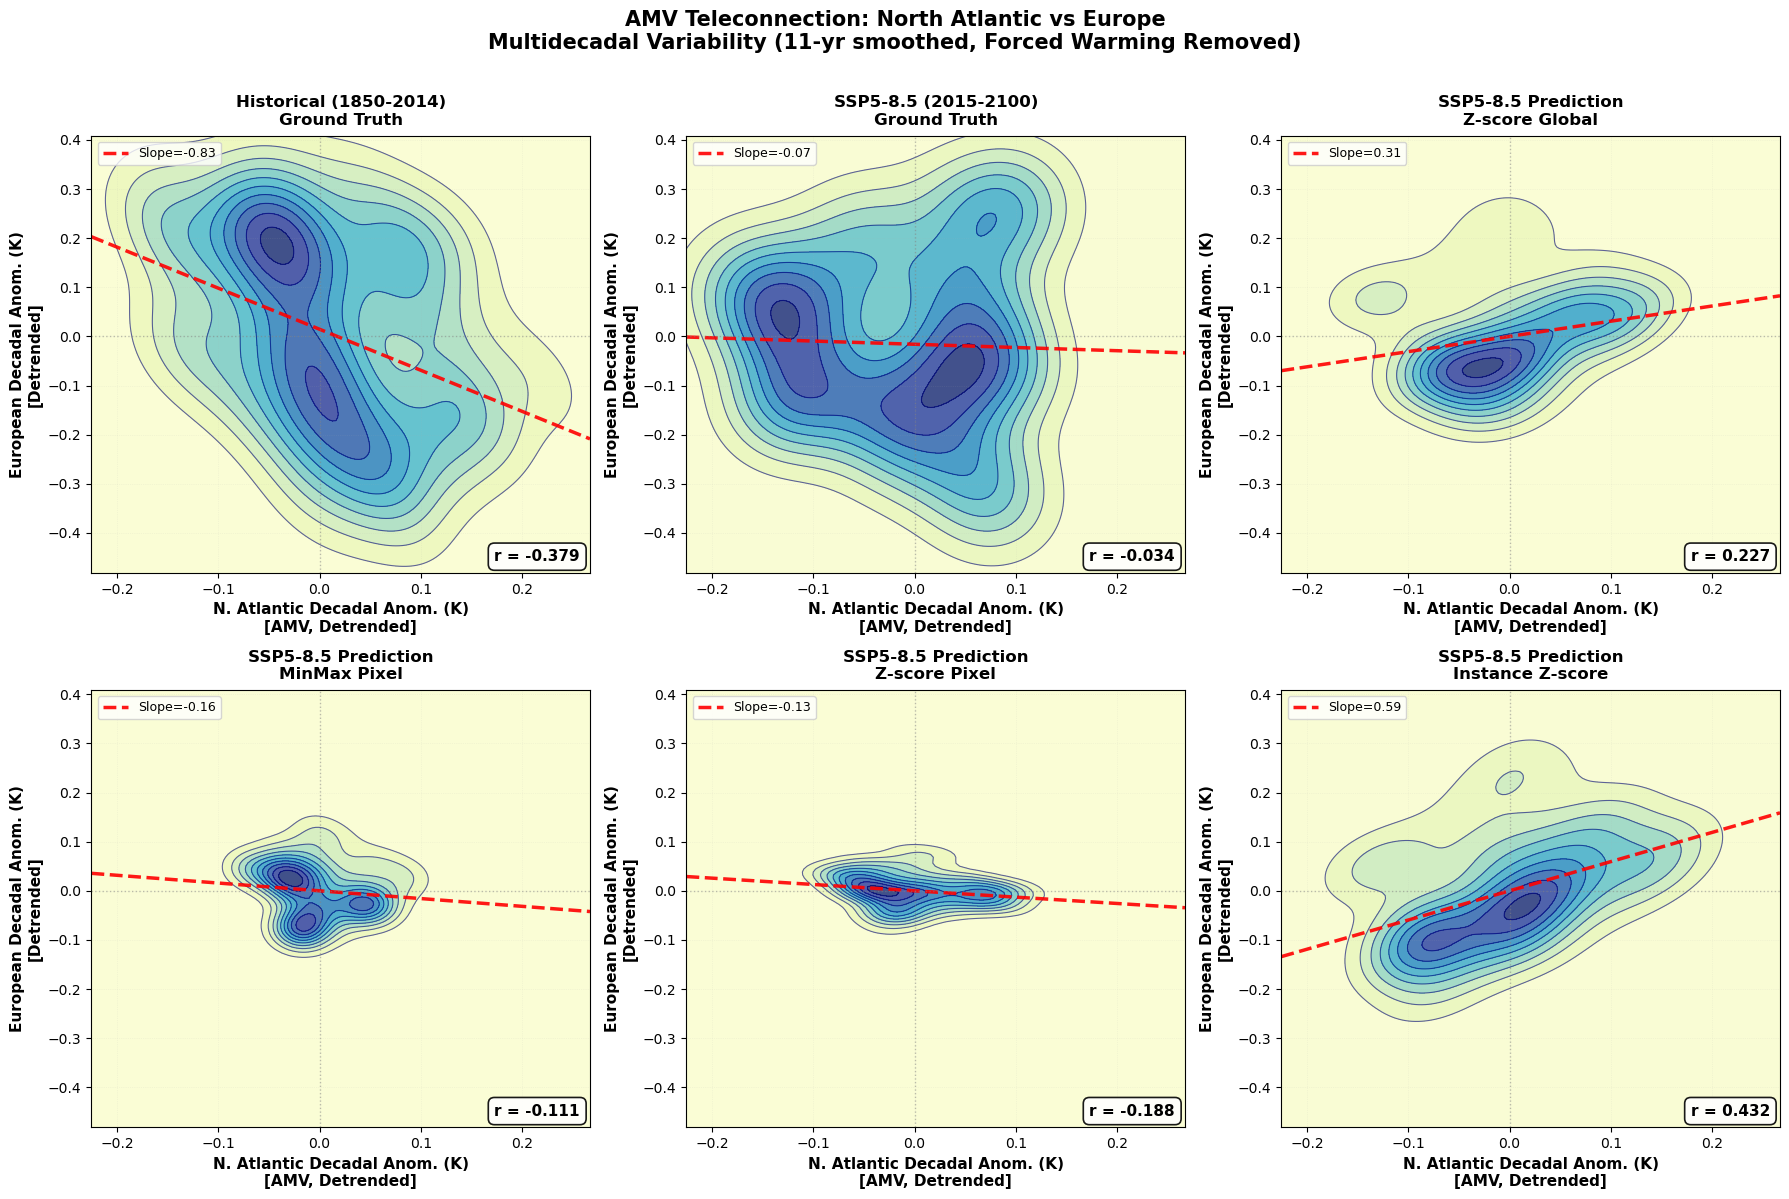

In [29]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from pathlib import Path

# Load climate data
data_dir = "data"
ds_hist = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_historical_r1i1p1f1_1850_2014_allvars.nc")
ds_ssp585 = xr.open_dataset(f"{data_dir}/MPI-ESM1-2-HR-LR_ssp585_r1i1p1f1_2015_2100_allvars.nc")

# Load model predictions
eval_dir = Path("evaluation_results")
ds_pred = xr.open_dataset(eval_dir / "tas_evaluation_ssp585.nc")

print("="*80)
print("AMV TELECONNECTION: Multidecadal Variability Analysis")
print("="*80)

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def regress_out_global(a, Tg):
    """
    Remove the part of 'a' linearly related to global mean Tg.
    This isolates internal variability by removing the forced warming signal.
    """
    A = np.vstack([Tg, np.ones_like(Tg)]).T
    beta, c = np.linalg.lstsq(A, a, rcond=None)[0]
    return a - (beta * Tg + c)

# ============================================================================
# PROCESS GROUND TRUTH DATA
# ============================================================================

print("\nProcessing ground truth data...")

# Concatenate historical and SSP585
tas_all = xr.concat([ds_hist['tas_hr'], ds_ssp585['tas_hr']], dim='time')

# 1. Annual means
print("  Computing annual means...")
tas_yr = tas_all.groupby('time.year').mean('time')

# 2. Global annual mean temperature
print("  Computing global annual mean...")
Tg_yr = tas_yr.mean(['lat', 'lon'])

# Baseline (1850-1900)
baseline_years = slice(1850, 1900)
Tg_base = Tg_yr.sel(year=baseline_years).mean('year')
Tg_anom = Tg_yr - Tg_base

# 3. AMV index from North Atlantic
# Region: 0–60°N, 75°W–7.5°W → 285–352.5°E in 0-360 coords
print("  Computing AMV index (North Atlantic)...")
amv_box = tas_yr.sel(lat=slice(0, 60), lon=slice(285, 352.5))
amv_yr = amv_box.mean(['lat', 'lon'])
amv_anom = amv_yr - amv_yr.sel(year=baseline_years).mean('year')

# 4. European region
# Simplified: 35–70°N, 0–40°E (Europe/western Eurasia)
print("  Computing European temperature...")
euro_box = tas_yr.sel(lat=slice(35, 70), lon=slice(0, 40))
euro_yr = euro_box.mean(['lat', 'lon'])
euro_anom = euro_yr - euro_yr.sel(year=baseline_years).mean('year')

# 5. Low-pass filter (11-year running mean for decadal variability)
print("  Applying 11-year running mean filter...")
amv_dec = amv_anom.rolling(year=11, center=True).mean().dropna('year')
euro_dec = euro_anom.rolling(year=11, center=True).mean().dropna('year')
Tg_dec = Tg_anom.rolling(year=11, center=True).mean().dropna('year')

# Align all arrays
amv_dec, euro_dec, Tg_dec = xr.align(amv_dec, euro_dec, Tg_dec, join='inner')

# 6. Convert to numpy and regress out global warming
print("  Removing forced warming signal...")
x_raw = amv_dec.values      # North Atlantic decadal tas
y_raw = euro_dec.values     # European decadal tas
Tg = Tg_dec.values          # global decadal tas

x_res = regress_out_global(x_raw, Tg)
y_res = regress_out_global(y_raw, Tg)
years = amv_dec['year'].values

# 7. Split into historical vs SSP585
hist_mask = years <= 2014
ssp_mask = years >= 2015

x_hist_gt = x_res[hist_mask]
y_hist_gt = y_res[hist_mask]
x_ssp_gt = x_res[ssp_mask]
y_ssp_gt = y_res[ssp_mask]

print(f"  Historical decadal samples: {len(x_hist_gt)}")
print(f"  SSP585 decadal samples: {len(x_ssp_gt)}")

# ============================================================================
# PROCESS MODEL PREDICTIONS
# ============================================================================

print("\nProcessing model predictions...")

norm_methods = ['zscore_global', 'minmax_pixel', 'zscore_pixel', 'instance_zscore']
model_labels = {
    'zscore_global': 'Z-score Global',
    'minmax_pixel': 'MinMax Pixel',
    'zscore_pixel': 'Z-score Pixel',
    'instance_zscore': 'Instance Z-score'
}

pred_data = {}

for method in norm_methods:
    pred_key = f'pred_{method}'
    if pred_key not in ds_pred:
        continue
    
    print(f"  Processing {model_labels[method]}...")
    
    # Extract SSP585 predictions
    tas_pred = ds_pred[pred_key]
    
    # Annual means
    tas_pred_yr = tas_pred.groupby('time.year').mean('time')
    
    # AMV index (North Atlantic)
    amv_pred_box = tas_pred_yr.sel(lat=slice(0, 60), lon=slice(285, 352.5))
    amv_pred_yr = amv_pred_box.mean(['lat', 'lon'])
    amv_pred_anom = amv_pred_yr - Tg_base  # Use same baseline
    
    # European region
    euro_pred_box = tas_pred_yr.sel(lat=slice(35, 70), lon=slice(0, 40))
    euro_pred_yr = euro_pred_box.mean(['lat', 'lon'])
    euro_pred_anom = euro_pred_yr - Tg_base  # Use same baseline
    
    # Global mean
    Tg_pred_yr = tas_pred_yr.mean(['lat', 'lon'])
    Tg_pred_anom = Tg_pred_yr - Tg_base
    
    # 11-year running mean
    amv_pred_dec = amv_pred_anom.rolling(year=11, center=True).mean().dropna('year')
    euro_pred_dec = euro_pred_anom.rolling(year=11, center=True).mean().dropna('year')
    Tg_pred_dec = Tg_pred_anom.rolling(year=11, center=True).mean().dropna('year')
    
    # Align
    amv_pred_dec, euro_pred_dec, Tg_pred_dec = xr.align(
        amv_pred_dec, euro_pred_dec, Tg_pred_dec, join='inner'
    )
    
    # Regress out global warming
    x_pred_raw = amv_pred_dec.values
    y_pred_raw = euro_pred_dec.values
    Tg_pred = Tg_pred_dec.values
    
    x_pred_res = regress_out_global(x_pred_raw, Tg_pred)
    y_pred_res = regress_out_global(y_pred_raw, Tg_pred)
    
    pred_data[method] = {
        'x': x_pred_res,
        'y': y_pred_res
    }

# ============================================================================
# PLOTTING
# ============================================================================

def plot_joint_contour(x, y, ax, title, xlim, ylim):
    """Plot joint density contours for AMV teleconnection"""
    # Compute joint KDE
    values = np.vstack([x, y])
    kde_joint = gaussian_kde(values, bw_method='scott')
    
    # Create grid
    grid_res = 150
    X, Y = np.mgrid[xlim[0]:xlim[1]:complex(0, grid_res), 
                     ylim[0]:ylim[1]:complex(0, grid_res)]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde_joint(positions).reshape(X.shape)
    
    # Plot contours
    contour_levels = 10
    ax.contourf(X, Y, Z, levels=contour_levels, cmap='YlGnBu', alpha=0.8)
    ax.contour(X, Y, Z, levels=contour_levels, colors='navy', linewidths=0.8, alpha=0.6)
    
    # Add regression line
    z = np.polyfit(x, y, 1)
    x_line = np.linspace(xlim[0], xlim[1], 100)
    y_line = np.polyval(z, x_line)
    ax.plot(x_line, y_line, 'r--', linewidth=2.5, alpha=0.9, label=f'Slope={z[0]:.2f}')
    
    # Reference lines
    ax.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax.axvline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    # Labels and formatting
    ax.set_xlabel('N. Atlantic Decadal Anom. (K)\n[AMV, Detrended]', 
                  fontsize=11, fontweight='bold')
    ax.set_ylabel('European Decadal Anom. (K)\n[Detrended]', 
                  fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold', pad=8)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(alpha=0.2, linestyle=':', linewidth=0.5)
    ax.tick_params(labelsize=10)
    ax.legend(loc='upper left', fontsize=9)
    
    # Add correlation
    corr = np.corrcoef(x, y)[0, 1]
    ax.text(0.98, 0.02, f'r = {corr:.3f}', 
            transform=ax.transAxes, fontsize=11, fontweight='bold',
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                     edgecolor='black', linewidth=1.2, alpha=0.9))

# Determine consistent axis limits
all_x = np.concatenate([x_hist_gt, x_ssp_gt] + [pred_data[m]['x'] for m in norm_methods])
all_y = np.concatenate([y_hist_gt, y_ssp_gt] + [pred_data[m]['y'] for m in norm_methods])

x_range = all_x.max() - all_x.min()
y_range = all_y.max() - all_y.min()

xlim = (all_x.min() - 0.1 * x_range, all_x.max() + 0.1 * x_range)
ylim = (all_y.min() - 0.1 * y_range, all_y.max() + 0.1 * y_range)

# Create 2x3 subplot figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Historical (Ground Truth)
plot_joint_contour(x_hist_gt, y_hist_gt, axes[0, 0],
                   'Historical (1850-2014)\nGround Truth', xlim, ylim)

# Plot 2: SSP585 (Ground Truth)
plot_joint_contour(x_ssp_gt, y_ssp_gt, axes[0, 1],
                   'SSP5-8.5 (2015-2100)\nGround Truth', xlim, ylim)

# Plot 3-6: Model Predictions for SSP585
plot_positions = [(0, 2), (1, 0), (1, 1), (1, 2)]
for idx, method in enumerate(norm_methods):
    if method in pred_data:
        row, col = plot_positions[idx]
        plot_joint_contour(pred_data[method]['x'], pred_data[method]['y'],
                          axes[row, col],
                          f'SSP5-8.5 Prediction\n{model_labels[method]}', xlim, ylim)

# Overall title
fig.suptitle('AMV Teleconnection: North Atlantic vs Europe\n' +
             'Multidecadal Variability (11-yr smoothed, Forced Warming Removed)',
             fontsize=15, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0, 0, 1, 0.985])


plt.show()
